# Fraudulent Activities

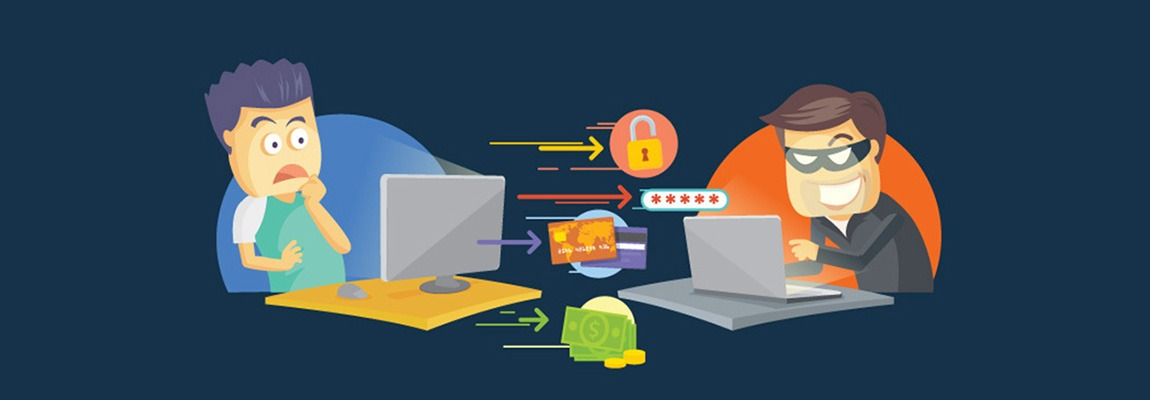 

## OBJECTIVE

E-commerce sites move a lot of money around. This can lead to significant risks of fraudulent activities, such as the use of stolen credit cards, money laundering, etc.

Fortunately, the Machine Learning can help us to identify these fraudulent activities. All the websites where you have to enter your payment information have a team that deals with managing the risk of fraud via ML.

The goal of this challenge is to build a model that allows you to predict the probability of fraudulent transactions.

## DESCRIPTION

Company X does E-commerce and sells handmade clothing. Your goal is to build a model to predict whether the purchase of a piece of clothing should be considered a fraudulent transaction or not.

Here is precisely what you need to do:

1. For each user, determine the country of origin from his or her IP address.

2. Build a model that predicts whether the activity is fraudulent or not. Also explain your choices/assumptions in terms of false positive and false negative optimization.

3. Your boss would like to understand your model because he is worried about using a _black box_ model. How would you explain it from a user point of view, not a mathematical one. For example, which users can be classified as _risky_?

4. Suppose you can use your model live to make its prediction in real time. From a product point of view, how would you use it? How would you think about the user experience with this product?


## DATA

You can use the following two tables:


Fraud_Data<br/>
&<br/>
IpAddress_to_Country

## Table of Contents <a class="anchor" id="0"></a>

I.   [Exploratory data analysis and visualisation](#1)<br/>

   1.  [Data visualisation Map](#1a) <br/>
   2.  [Data time](#1b)<br/>
   3.  [Data ip_count](#1c)<br/>
   4.  [Data Matrice de confusion](#1d)<br/>
  
II.  [Time to do Machine Learning](#2)<br/>

   1.  [Logistic Regression](#2a) <br/>
   2.  [Logistic Regression + Gridsearch](#2b)<br/>
   3.  [Random Forest](#2c)<br/>
   4.  [Random Forest + Gridsearch](#2d)<br/>
   5.  [Addaboost and XGboost](#2e)<br/>

III. [Staking and Voting](#3)<br/>

   1.  [Voting](#3a) <br/>
   2.  [Staking](#3b)<br/>

IV.  [Bonus : PCA SMOTETomek](#4) <br/>

V.   [Evaluation Report](#5) <br/>
  

# Exploratory data analysis and visualisation <a class="anchor" id="1"></a>
[return to contents](#0)

In [1]:
# standard
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
# importing data
Fraud_Data = pd.read_csv("Datasets/Fraud_Data.csv")
IpAddress = pd.read_csv("Datasets/IpAddress_to_Country.csv")

In [4]:
# returns the first 10 rows
Fraud_Data.head(10)

user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   
5   159135  2015-05-21 06:03:03  2015-07-09 08:05:14              42   
6    50116  2015-08-01 22:40:52  2015-08-27 03:37:57              11   
7   360585  2015-04-06 07:35:45  2015-05-25 17:21:14              27   
8   159045  2015-04-21 23:38:34  2015-06-02 14:01:54              30   
9   182338  2015-01-25 17:49:49  2015-03-23 23:05:42              62   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  
5  ALEYXFXINSXLZ    Ads  Chrome   M   18  2.809315e+09      0  
6  IWKVZHJOCLPUR    Ads  Chrome   F   19  3.987484e+09      0  
7  HPUCUYLMJBYFW    Ads   Opera   M   34  1.692459e+09      0  
8  ILXYDOZIHOOHT    SEO      IE   F   43  3.719094e+09      0  
9  NRFFPPHZYFUVC    Ads      IE   M   31  3.416747e+08      0

In [5]:
# returns the first 10 rows
IpAddress.head(10)

lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0                16777471  Australia
1              16777472.0                16777727      China
2              16777728.0                16778239      China
3              16778240.0                16779263  Australia
4              16779264.0                16781311      China
5              16781312.0                16785407      Japan
6              16785408.0                16793599      China
7              16793600.0                16809983      Japan
8              16809984.0                16842751   Thailand
9              16842752.0                16843007      China

In [6]:
k=[]
for i in range(len(Fraud_Data['ip_address'])):
    ip=Fraud_Data['ip_address'][i]
    tmp=IpAddress[(IpAddress['lower_bound_ip_address']<=ip) & (IpAddress['upper_bound_ip_address']>=ip)]['country'].tolist()
    k.extend(tmp if tmp else ['Others'])   

In [7]:
Fraud_Data['country']=k

In [8]:
Fraud_Data.head(10)

user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   
5   159135  2015-05-21 06:03:03  2015-07-09 08:05:14              42   
6    50116  2015-08-01 22:40:52  2015-08-27 03:37:57              11   
7   360585  2015-04-06 07:35:45  2015-05-25 17:21:14              27   
8   159045  2015-04-21 23:38:34  2015-06-02 14:01:54              30   
9   182338  2015-01-25 17:49:49  2015-03-23 23:05:42              62   

       device_id source browser sex  age    ip_address  class        country  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0          Japan  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  United States  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  United States  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0         Others  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  United States  
5  ALEYXFXINSXLZ    Ads  Chrome   M   18  2.809315e+09      0         Canada  
6  IWKVZHJOCLPUR    Ads  Chrome   F   19  3.987484e+09      0         Others  
7  HPUCUYLMJBYFW    Ads   Opera   M   34  1.692459e+09      0  United States  
8  ILXYDOZIHOOHT    SEO      IE   F   43  3.719094e+09      0          China  
9  NRFFPPHZYFUVC    Ads      IE   M   31  3.416747e+08      0  United States

In [9]:
Fraud_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
 11  country         151112 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 13.8+ MB


In [10]:
Fraud_Data.describe()

user_id  purchase_value            age    ip_address  \
count  151112.000000   151112.000000  151112.000000  1.511120e+05   
mean   200171.040970       36.935372      33.140704  2.152145e+09   
std    115369.285024       18.322762       8.617733  1.248497e+09   
min         2.000000        9.000000      18.000000  5.209350e+04   
25%    100642.500000       22.000000      27.000000  1.085934e+09   
50%    199958.000000       35.000000      33.000000  2.154770e+09   
75%    300054.000000       49.000000      39.000000  3.243258e+09   
max    400000.000000      154.000000      76.000000  4.294850e+09   

               class  
count  151112.000000  
mean        0.093646  
std         0.291336  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [11]:
Fraud_Data['country'].value_counts()

United States                     58049
Others                            21966
China                             12038
Japan                              7306
United Kingdom                     4490
                                  ...  
Guadeloupe                            1
British Indian Ocean Territory        1
Nauru                                 1
Burundi                               1
Dominica                              1
Name: country, Length: 182, dtype: int64

In [206]:
# Print the ratio of fraud cases
ratio_cases = (Fraud_Data['class'].value_counts()/Fraud_Data['class'].value_counts().sum()).round(3)
print(f'Ratio of fraudulent cases: {ratio_cases[1]}\nRatio of non-fraudulent cases: {ratio_cases[0]}')

Ratio of fraudulent cases: 0.094
Ratio of non-fraudulent cases: 0.906


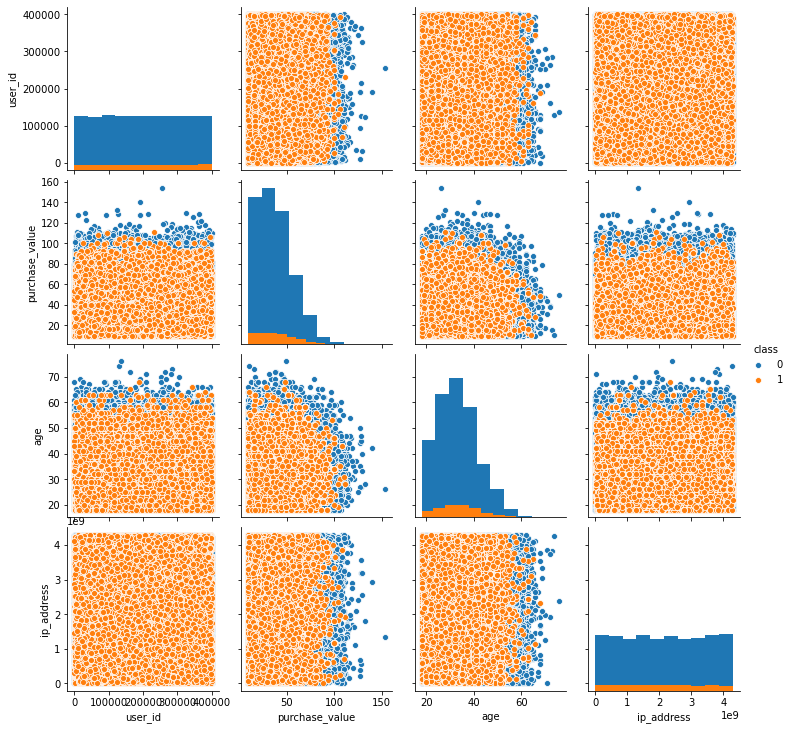

In [13]:
sns.pairplot(Fraud_Data, dropna=True, hue='class', diag_kind='hist')

In [14]:
Fraud_Data['country'].isnull().value_counts()/Fraud_Data['country'].isnull().value_counts().sum()

False    1.0
Name: country, dtype: float64

## Data Visualisation MAP <a class="anchor" id="1a"></a>
[return to contents](#0)

In [15]:
import geopandas as gpd
shapefile = 'Datasets/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
gdf1= gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf1.columns = ['country', 'country_code', 'geometry']
gdf.shape

(177, 3)

In [16]:
Fraud_Data_map= Fraud_Data[['country','class']]
Fraud_Data_map.dropna(how='all')

country  class
0               Japan      0
1       United States      0
2       United States      1
3              Others      0
4       United States      0
...               ...    ...
151107  United States      1
151108    Netherlands      0
151109          Japan      0
151110  United States      0
151111         Others      0

[151112 rows x 2 columns]

In [17]:
Fraud_Data_map[(Fraud_Data_map['class']==1) |(Fraud_Data_map['class']==0)].groupby('country').size().sum()

151112

In [18]:
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="United States", value="United States of America")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Viet Nam", value="Vietnam")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Korea Republic of", value="South Korea")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Russian Federation", value="Russia")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Moldova Republic of", value="Moldova")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Croatia (LOCAL Name: Hrvatska)", value="Croatia")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Bahamas", value="The Bahamas")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Tanzania United Republic of", value="United Republic of Tanzania")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Taiwan; Republic of China (ROC)", value="Taiwan")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Congo", value="Republic of the Congo")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Congo The Democratic Republic of The", value="Democratic Republic of the Congo")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Slovakia (SLOVAK Republic)", value="Slovakia")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Lao People's Democratic Republic", value="Laos")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Syrian Arab Republic", value="Syria")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Serbia", value="Republic of Serbia")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Libyan Arab Jamahiriya", value="Libya")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Iran (ISLAMIC Republic Of)", value="Iran")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Cote D'ivoire", value="Ivory Coast")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Bosnia and Herzegowina", value="Bosnia and Herzegovina")
Fraud_Data_map=Fraud_Data_map.replace(to_replace ="Czech Republic", value="Czechia")


In [19]:
Fraud_Data_map11=Fraud_Data_map[Fraud_Data_map['class']==1].groupby('country').size()/(Fraud_Data_map[(Fraud_Data_map['class']==1)].groupby('country').size().sum())*100
Fraud_Data_map11 = pd.DataFrame(Fraud_Data_map11)
Fraud_Data_map11.sort_values(0, ascending=False).head(20)

0
country                            
United States of America  39.226910
Others                    13.306480
China                      7.370504
Japan                      5.052646
United Kingdom             3.370787
South Korea                2.685323
Canada                     2.459190
France                     2.119992
Brazil                     1.907992
Germany                    1.851459
Italy                      1.173062
Australia                  1.165995
India                      1.067062
Mexico                     1.017596
Russia                     0.946930
Sweden                     0.925730
Netherlands                0.869197
Taiwan                     0.699597
Norway                     0.558264
Denmark                    0.551198

In [20]:
Fraud_Data_map1=Fraud_Data_map.dropna(how='all').groupby("country")
Fraud_Data_map1=pd.DataFrame(Fraud_Data_map1)
Fraud_Data_map1.shape

(182, 2)

In [21]:
# Identify what values are in TableB and not in TableA
key_diff = set(Fraud_Data_map1[0]).difference(gdf['country'])
where_diff = Fraud_Data_map1[0].isin(key_diff)

Fraud_Data_map1['where_diff']=where_diff

In [22]:
Fraud_Data_map1[0][Fraud_Data_map1['where_diff']==True].reset_index(drop=True)

0                Antigua and Barbuda
1                            Bahrain
2                           Barbados
3                            Bermuda
4      Bonaire; Sint Eustatius; Saba
5     British Indian Ocean Territory
6                  Brunei Darussalam
7                         Cape Verde
8                     Cayman Islands
9                            Curacao
10                          Dominica
11                    European Union
12                     Faroe Islands
13                         Gibraltar
14                        Guadeloupe
15                              Guam
16                         Hong Kong
17                     Liechtenstein
18                             Macau
19                          Maldives
20                             Malta
21                         Mauritius
22                            Monaco
23                             Nauru
24                            Others
25    Palestinian Territory Occupied
26                           Reunion
2

In [23]:
# Identify what values are in TableB and not in TableA
key_diff = set(gdf1['country']).difference(Fraud_Data_map1[0])
where_diff = gdf1['country'].isin(key_diff)

gdf1['where_diff']=where_diff

In [24]:
gdf1['country'][gdf1['where_diff']==True].reset_index(drop=True)

0                          Western Sahara
1                                 Somalia
2                                    Chad
3                        Falkland Islands
4                               Greenland
5     French Southern and Antarctic Lands
6                              East Timor
7                                  Guyana
8                                Suriname
9                                    Mali
10                             Mauritania
11                                   Togo
12                                 Guinea
13                          Guinea-Bissau
14                                Liberia
15                           Sierra Leone
16               Central African Republic
17                      Equatorial Guinea
18                               eSwatini
19                              Palestine
20                            North Korea
21                        Solomon Islands
22                                 Brunei
23                                

In [799]:
#Merge dataframes gdf and Fraud_Data.
merged = gdf.merge(Fraud_Data_map, left_on = 'country', right_on = 'country',  how = 'left')

Data['Percent_of_Fraud']=merged.groupby(by="country").mean()["class"]
#Data['Percent_of_Fraud']= merged[merged['class']==1].groupby('country').size()/(merged[(merged['class']==1)].groupby('country').size().sum())*100
Data = pd.DataFrame(Data)
Data['Percent_of_Fraud']=Data['Percent_of_Fraud']*100

#Merge dataframes gdf and Data.
merged = gdf.merge(Data, left_on = 'country', right_on = 'country',  how = 'left')
merged.sort_values("Percent_of_Fraud", ascending = False)

country country_code  \
106  Turkmenistan          TKM   
50        Namibia          NAM   
138     Sri Lanka          LKA   
128    Luxembourg          LUX   
44        Ecuador          ECU   
..            ...          ...   
167    Somaliland          SOL   
168        Uganda          UGA   
169        Rwanda          RWA   
174        Kosovo          KOS   
176   South Sudan          SDS   

                                              geometry  Percent_of_Fraud  
106  POLYGON ((52.50246 41.78332, 52.94429 42.11603...        100.000000  
50   POLYGON ((19.89577 -24.76779, 19.89473 -28.461...         43.478261  
138  POLYGON ((81.78796 7.52306, 81.63732 6.48178, ...         41.935484  
128  POLYGON ((6.04307 50.12805, 6.24275 49.90223, ...         38.888889  
44   POLYGON ((-75.37322 -0.15203, -75.23372 -0.911...         26.415094  
..                                                 ...               ...  
167  POLYGON ((48.94820 11.41062, 48.94820 11.41062...               NaN  
168  POLYGON ((33.90371 -0.95000, 31.86617 -1.02736...               NaN  
169  POLYGON ((30.41910 -1.13466, 30.81613 -1.69891...               NaN  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...               NaN  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...               NaN  

[177 rows x 4 columns]

In [800]:
import json
#Read data to json.
merged_json = json.loads(merged.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)

In [804]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import *
import colorcet as cc

#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)
#Define a sequential multi-hue color palette.
palette = cc.kr
#kbc en bleu
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 20, nan_color = '#d9d9d9')
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal')
#Create figure object.
p = figure(title = 'Percent of fraudulent activities', plot_height = 600 , plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'Percent_of_Fraud', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify figure layout.
p.add_layout(color_bar, 'below')
#Display figure inline in Jupyter Notebook.
output_notebook()
#Display figure.
show(p)

Loading BokehJS ...

In [41]:
merged['Percent_of_Fraud'] = merged['Percent_of_Fraud'].round(2)

In [74]:
merged.drop(columns=['country_code','geometry']).sort_values('Percent_of_Fraud', ascending=False).head(50).reset_index(drop=True)

country  Percent_of_Fraud
0   United States of America             45.65
1                      China              8.58
2                      Japan              5.88
3             United Kingdom              3.92
4                South Korea              3.12
5                     Canada              2.86
6                     France              2.47
7                     Brazil              2.22
8                    Germany              2.15
9                      Italy              1.37
10                 Australia              1.36
11                     India              1.24
12                    Mexico              1.18
13                    Russia              1.10
14                    Sweden              1.08
15               Netherlands              1.01
16                    Taiwan              0.81
17                    Norway              0.65
18                   Denmark              0.64
19              South Africa              0.61
20                     Spain              0.60
21               Switzerland              0.57
22                 Argentina              0.54
23                     Chile              0.53
24               New Zealand              0.51
25                 Indonesia              0.47
26                   Belgium              0.46
27                   Ireland              0.45
28                   Ukraine              0.41
29              Saudi Arabia              0.41
30                     Egypt              0.39
31                   Finland              0.36
32                    Turkey              0.35
33                      Iran              0.35
34                    Poland              0.32
35                   Vietnam              0.30
36                  Colombia              0.30
37                   Czechia              0.28
38                 Venezuela              0.27
39                    Greece              0.27
40                   Austria              0.27
41                      Peru              0.25
42                   Tunisia              0.25
43                   Ecuador              0.23
44                Luxembourg              0.23
45                   Romania              0.22
46                    Kuwait              0.17
47                  Thailand              0.16
48                   Hungary              0.16
49                 Lithuania              0.15

In [121]:
Fraud_Data['country'].isnull().value_counts()

False    151112
Name: country, dtype: int64

In [414]:
ZOULOU= Fraud_Data.groupby(by="country").mean()["class"].sort_values(ascending = False).reset_index()

In [415]:
ZOULOU.head(30)

country     class
0            Turkmenistan  1.000000
1                 Namibia  0.434783
2               Sri Lanka  0.419355
3              Luxembourg  0.388889
4   Virgin Islands (U.S.)  0.333333
5                 Ecuador  0.264151
6                 Tunisia  0.262712
7                    Peru  0.260504
8                 Bolivia  0.245283
9                  Kuwait  0.233333
10                Ireland  0.229167
11            New Zealand  0.223022
12             Uzbekistan  0.200000
13              Lithuania  0.189474
14           Saudi Arabia  0.189394
15                  Malta  0.181818
16          Cote D'ivoire  0.166667
17            Afghanistan  0.166667
18                Denmark  0.159184
19                  Chile  0.153477
20             Montenegro  0.142857
21                 Malawi  0.142857
22                 Greece  0.142857
23   United Arab Emirates  0.140351
24                Belgium  0.136919
25                  Egypt  0.133705
26             Costa Rica  0.133333
27                Armenia  0.133333
28              Venezuela  0.131474
29                 Norway  0.129721

In [123]:
Count_country = pd.DataFrame(Fraud_Data.groupby(by="country").sum()["class"].sort_values(ascending = False).reset_index())

C=[]
for i in range(len(Fraud_Data['country'])):
    country=Fraud_Data['country'][i]
    coun=Count_country[(Count_country['country']==country)]['class'].tolist()
    C.extend(coun if coun else ['Others'])   

In [125]:
Fraud_Data['Country_count']=C

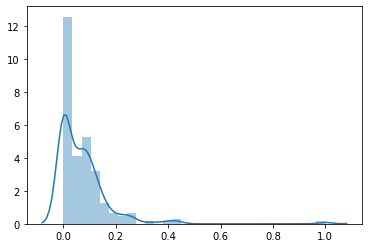

In [98]:
sns.distplot(risk_country)

In [127]:
Fraud_Data.drop(columns='country_count')

user_id          signup_time        purchase_time  purchase_value  \
0         22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1        333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2          1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3        150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4        221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   
...         ...                  ...                  ...             ...   
151107   345170  2015-01-27 03:03:34  2015-03-29 00:30:47              43   
151108   274471  2015-05-15 17:43:29  2015-05-26 12:24:39              35   
151109   368416  2015-03-03 23:07:31  2015-05-20 07:07:47              40   
151110   207709  2015-07-09 20:06:07  2015-09-07 09:34:46              46   
151111   138208  2015-06-10 07:02:20  2015-07-21 02:03:53              20   

            device_id  source browser sex  age    ip_address  class  \
0       QVPSPJUOCKZAR     SEO  Chrome   M   39  7.327584e+08      0   
1       EOGFQPIZPYXFZ     Ads  Chrome   F   53  3.503114e+08      0   
2       YSSKYOSJHPPLJ     SEO   Opera   M   53  2.621474e+09      1   
3       ATGTXKYKUDUQN     SEO  Safari   M   41  3.840542e+09      0   
4       NAUITBZFJKHWW     Ads  Safari   M   45  4.155831e+08      0   
...               ...     ...     ...  ..  ...           ...    ...   
151107  XPSKTWGPWINLR     SEO  Chrome   M   28  3.451155e+09      1   
151108  LYSFABUCPCGBA     SEO  Safari   M   32  2.439047e+09      0   
151109  MEQHCSJUBRBFE     SEO      IE   F   26  2.748471e+09      0   
151110  CMCXFGRHYSTVJ     SEO  Chrome   M   37  3.601175e+09      0   
151111  ZINIADFCLHYPG  Direct      IE   M   38  4.103825e+09      0   

              country       time  ip_count  Country_count  
0               Japan  52.160671         1            715  
1       United States   0.207685         1           5551  
2       United States   0.000012        12           5551  
3              Others   5.695428         1           1883  
4       United States  50.479873         1           5551  
...               ...        ...       ...            ...  
151107  United States  60.893900         1           5551  
151108    Netherlands  10.778588         1            123  
151109          Japan  77.333519         1            715  
151110  United States  59.561563         1           5551  
151111         Others  40.792743         1           1883  

[151112 rows x 15 columns]

# Data Time <a class="anchor" id="1b"></a>
[return to contents](#0)

In [45]:
from datetime import time
# returns the first 10 rows
Fraud_Data.head(10)

user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   
5   159135  2015-05-21 06:03:03  2015-07-09 08:05:14              42   
6    50116  2015-08-01 22:40:52  2015-08-27 03:37:57              11   
7   360585  2015-04-06 07:35:45  2015-05-25 17:21:14              27   
8   159045  2015-04-21 23:38:34  2015-06-02 14:01:54              30   
9   182338  2015-01-25 17:49:49  2015-03-23 23:05:42              62   

       device_id source browser sex  age    ip_address  class        country  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0          Japan  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  United States  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  United States  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0         Others  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  United States  
5  ALEYXFXINSXLZ    Ads  Chrome   M   18  2.809315e+09      0         Canada  
6  IWKVZHJOCLPUR    Ads  Chrome   F   19  3.987484e+09      0         Others  
7  HPUCUYLMJBYFW    Ads   Opera   M   34  1.692459e+09      0  United States  
8  ILXYDOZIHOOHT    SEO      IE   F   43  3.719094e+09      0          China  
9  NRFFPPHZYFUVC    Ads      IE   M   31  3.416747e+08      0  United States

In [46]:
from datetime import datetime
s = "2015-02-24 22:55:49"
y = "2015-04-18 02:47:11"
f = "%Y-%m-%d %H:%M:%S"
out = datetime.strptime(s, f)
out1 = datetime.strptime(y, f)
d=out1-out
print(d)
# Converting a to string in the desired format (YYYYMMDD) using strftime
# and then to int.
d.total_seconds()/60/60/24

52 days, 3:51:22


52.1606712962963

In [702]:
a=[]
b=[]

for i in range(len(Fraud_Data['signup_time'])):
    a.append(datetime.strptime(Fraud_Data['signup_time'][i], "%Y-%m-%d %H:%M:%S"))
    b.append(datetime.strptime(Fraud_Data['purchase_time'][i], "%Y-%m-%d %H:%M:%S"))

In [48]:
c=np.array(b)-np.array(a)
Fraud_Data['time']=c

In [49]:
u=[]
for i in range(len(Fraud_Data['time'])):
    u.append(Fraud_Data['time'][i].total_seconds()/60/60/24)

In [50]:
Fraud_Data['time']=u

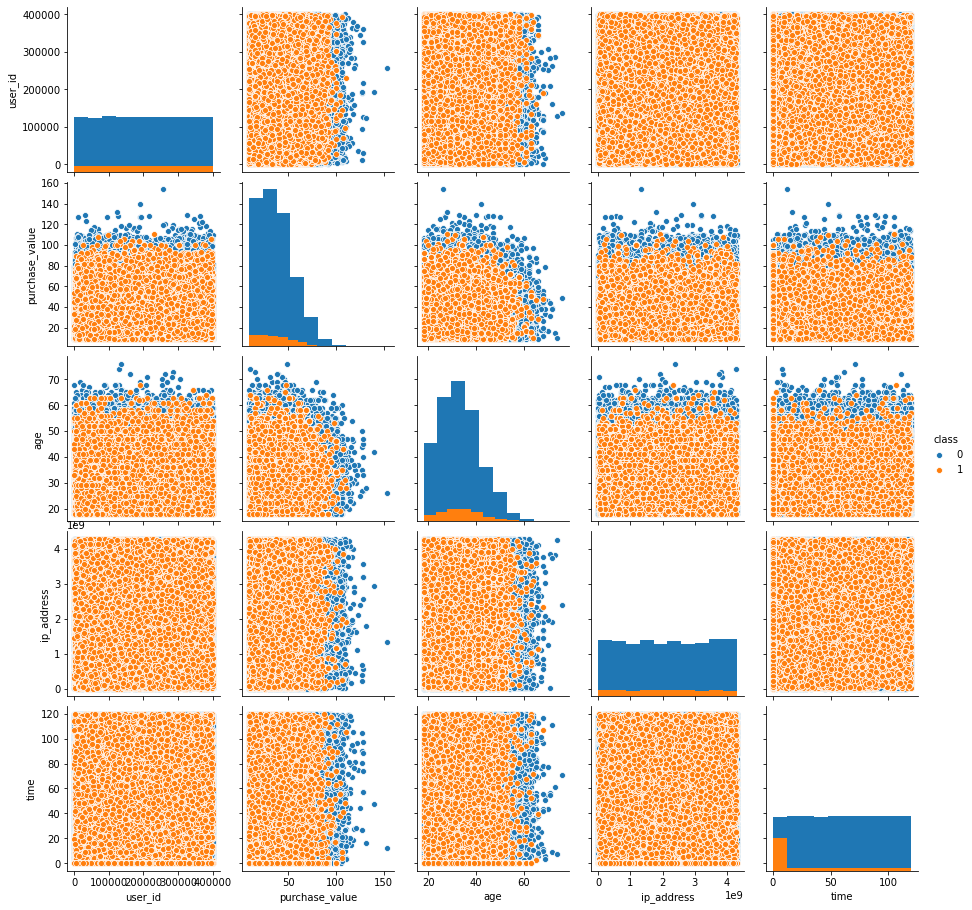

In [51]:
#graphique 
sns.pairplot(Fraud_Data, dropna=True, hue='class', diag_kind='hist')

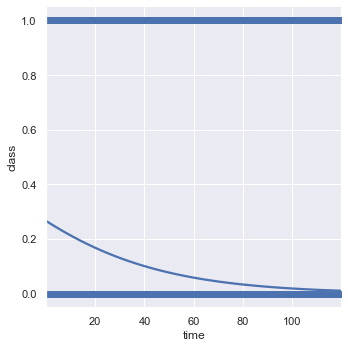

In [627]:
sns.lmplot(x="time", y="class", data= Fraud_Data, logistic = True)

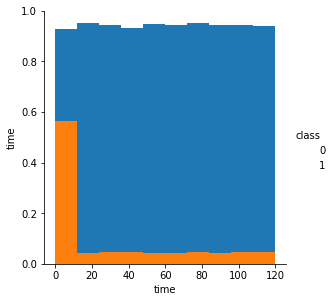

In [52]:
g = sns.PairGrid(Fraud_Data[["class","time"]], hue="class",height=4)
g = g.map_diag(plt.hist)
g = g.add_legend()

## Data ip_count <a class="anchor" id="1c"></a>
[return to contents](#0)

In [53]:
print(Fraud_Data.device_id)
ip_count = Fraud_Data.groupby('ip_address')['user_id'].count()


0         QVPSPJUOCKZAR
1         EOGFQPIZPYXFZ
2         YSSKYOSJHPPLJ
3         ATGTXKYKUDUQN
4         NAUITBZFJKHWW
              ...      
151107    XPSKTWGPWINLR
151108    LYSFABUCPCGBA
151109    MEQHCSJUBRBFE
151110    CMCXFGRHYSTVJ
151111    ZINIADFCLHYPG
Name: device_id, Length: 151112, dtype: object


In [54]:
df = pd.DataFrame(ip_count.sort_values(ascending=False).reset_index())

In [55]:
df.iloc[0,0]

1502818419.73176

In [56]:
Fraud_Data[Fraud_Data.ip_address == 1502818419.73176]

user_id          signup_time        purchase_time  purchase_value  \
9679     101698  2015-01-06 06:33:21  2015-01-06 06:33:22              47   
22782    344459  2015-01-06 06:33:23  2015-01-06 06:33:24              47   
27520    129583  2015-01-06 06:33:22  2015-01-06 06:33:23              47   
33712    155117  2015-01-06 06:33:24  2015-01-06 06:33:25              47   
43697    249911  2015-01-06 06:33:36  2015-01-06 06:33:37              47   
51626    216960  2015-01-06 06:33:33  2015-01-06 06:33:34              47   
55085     52655  2015-01-06 06:33:31  2015-01-06 06:33:32              47   
57766    380746  2015-01-06 06:33:35  2015-01-06 06:33:36              47   
59817    369801  2015-01-06 06:33:25  2015-01-06 06:33:26              47   
61092    170427  2015-01-06 06:33:32  2015-01-06 06:33:33              47   
79733    215226  2015-01-06 06:33:34  2015-01-06 06:33:35              47   
83664    197716  2015-01-06 06:33:37  2015-01-06 06:33:38              47   
110759   308527  2015-01-06 06:33:29  2015-01-06 06:33:30              47   
117048   315519  2015-01-06 06:33:20  2015-01-06 06:33:21              47   
121787   382824  2015-01-06 06:33:28  2015-01-06 06:33:29              47   
123442   335204  2015-01-06 06:33:19  2015-01-06 06:33:20              47   
126392   236573  2015-01-06 06:33:30  2015-01-06 06:33:31              47   
144935   151070  2015-01-06 06:33:27  2015-01-06 06:33:28              47   
146768   257171  2015-01-06 06:33:18  2015-03-29 03:32:06              47   
149388     8863  2015-01-06 06:33:26  2015-01-06 06:33:27              47   

            device_id source browser sex  age    ip_address  class  \
9679    ZUSVMDEZRBDTX    Ads  Safari   M   55  1.502818e+09      1   
22782   ZUSVMDEZRBDTX    Ads  Safari   M   55  1.502818e+09      1   
27520   ZUSVMDEZRBDTX    Ads  Safari   M   55  1.502818e+09      1   
33712   ZUSVMDEZRBDTX    Ads  Safari   M   55  1.502818e+09      1   
43697   ZUSVMDEZRBDTX    Ads  Safari   M   55  1.502818e+09      1   
51626   ZUSVMDEZRBDTX    Ads  Safari   M   55  1.502818e+09      1   
55085   ZUSVMDEZRBDTX    Ads  Safari   M   55  1.502818e+09      1   
57766   ZUSVMDEZRBDTX    Ads  Safari   M   55  1.502818e+09      1   
59817   ZUSVMDEZRBDTX    Ads  Safari   M   55  1.502818e+09      1   
61092   ZUSVMDEZRBDTX    Ads  Safari   M   55  1.502818e+09      1   
79733   ZUSVMDEZRBDTX    Ads  Safari   M   55  1.502818e+09      1   
83664   ZUSVMDEZRBDTX    Ads  Safari   M   55  1.502818e+09      1   
110759  ZUSVMDEZRBDTX    Ads  Safari   M   55  1.502818e+09      1   
117048  ZUSVMDEZRBDTX    Ads  Safari   M   55  1.502818e+09      1   
121787  ZUSVMDEZRBDTX    Ads  Safari   M   55  1.502818e+09      1   
123442  ZUSVMDEZRBDTX    Ads  Safari   M   55  1.502818e+09      1   
126392  ZUSVMDEZRBDTX    Ads  Safari   M   55  1.502818e+09      1   
144935  ZUSVMDEZRBDTX    Ads  Safari   M   55  1.502818e+09      1   
146768  ZUSVMDEZRBDTX    Ads  Safari   M   55  1.502818e+09      0   
149388  ZUSVMDEZRBDTX    Ads  Safari   M   55  1.502818e+09      1   

             country       time  
9679    Saudi Arabia   0.000012  
22782   Saudi Arabia   0.000012  
27520   Saudi Arabia   0.000012  
33712   Saudi Arabia   0.000012  
43697   Saudi Arabia   0.000012  
51626   Saudi Arabia   0.000012  
55085   Saudi Arabia   0.000012  
57766   Saudi Arabia   0.000012  
59817   Saudi Arabia   0.000012  
61092   Saudi Arabia   0.000012  
79733   Saudi Arabia   0.000012  
83664   Saudi Arabia   0.000012  
110759  Saudi Arabia   0.000012  
117048  Saudi Arabia   0.000012  
121787  Saudi Arabia   0.000012  
123442  Saudi Arabia   0.000012  
126392  Saudi Arabia   0.000012  
144935  Saudi Arabia   0.000012  
146768  Saudi Arabia  81.874167  
149388  Saudi Arabia   0.000012

In [57]:
ip_count = ip_count[Fraud_Data['ip_address']].reset_index().drop('ip_address', axis = 1)
ip_count.columns = ['ip_count']
Fraud_Data = pd.concat([Fraud_Data, ip_count], axis = 1)

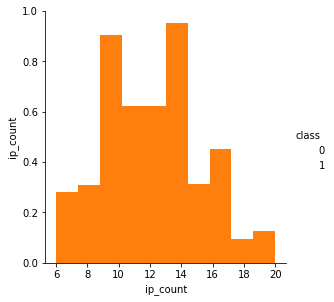

In [58]:
g = sns.PairGrid(Fraud_Data[["class","ip_count"]][Fraud_Data.ip_count >5], hue="class",height=4)
g = g.map_diag(plt.hist)
g = g.add_legend()

## Data Matrice de confusion <a class="anchor" id="1d"></a>
[return to contents](#0)

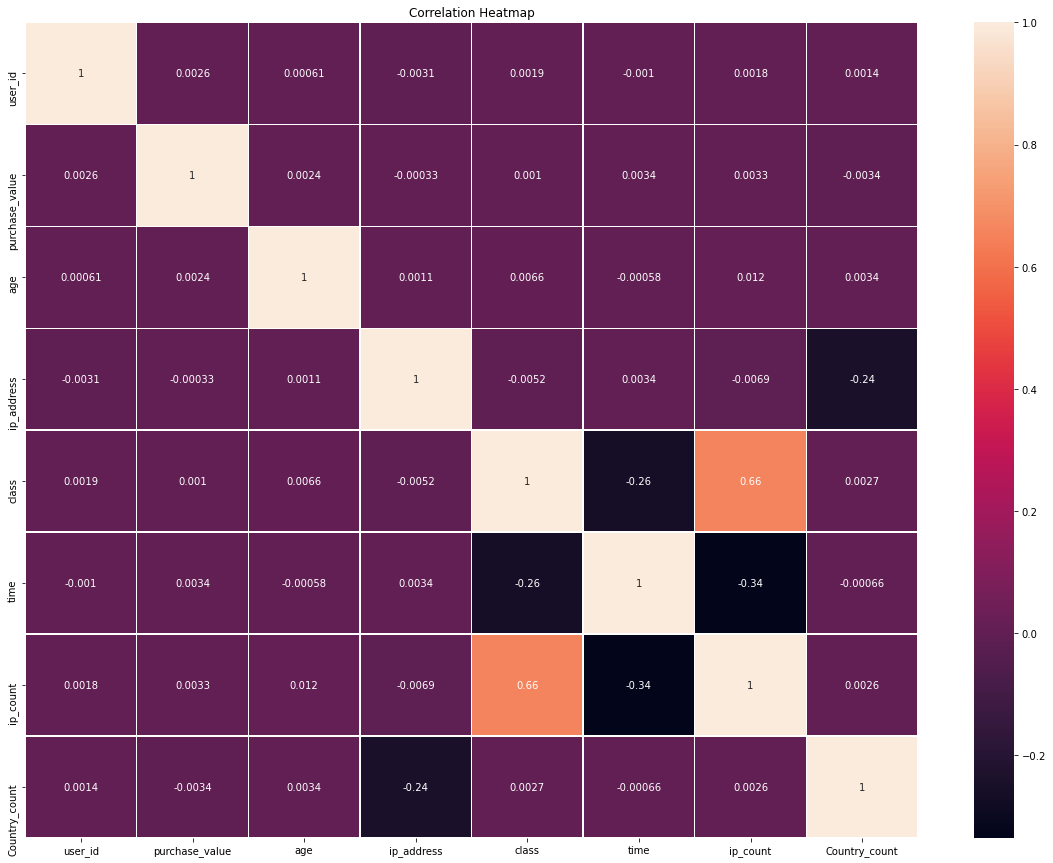

In [771]:
# heatmap on affiche uniquement les variables qui ont une corrélation d'au moins 50% avec un autre variable
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr =Fraud_Data.corr()
max_corr = [max(abs(a[a!=1])) for a in corr.values]
date4 = Fraud_Data.iloc[:,]
corr_high = date4.corr()
sns.heatmap(corr_high, 
            xticklabels=corr_high.columns.values,
            yticklabels=corr_high.columns.values,
           annot=True, linewidths=.5)

In [770]:
Fraud_Data=Fraud_Data.drop(columns="signup_seconds_of_day")

# Time to do Machine Learning <a class="anchor" id="2"></a>
[return to contents](#0)

## Logistic Regression<a class="anchor" id="2a"></a>
[return to contents](#0)

In [293]:
Fraud_Data.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'country', 'time', 'ip_count', 'country_count', 'Country_count'],
      dtype='object')

In [61]:
Fraud_Data.isnull().any()

user_id           False
signup_time       False
purchase_time     False
purchase_value    False
device_id         False
source            False
browser           False
sex               False
age               False
ip_address        False
class             False
country           False
time              False
ip_count          False
dtype: bool

In [294]:
features_list = ['purchase_value',  'source', 'browser', 'sex','age', 'time', 'ip_count','Country_count']
target_variable = "class"

X = Fraud_Data.loc[:,features_list]
Y = Fraud_Data.loc[:,target_variable]

In [295]:
idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X.dtypes.iteritems():
  if ('float' in str(t)) or ('int' in str(t)) :
    numeric_features.append(i)
    numeric_indices.append(idx)
  else :
    categorical_features.append(i)
    categorical_indices.append(idx)

  idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['purchase_value', 'age', 'time', 'ip_count', 'Country_count']  at positions  [0, 4, 5, 6, 7]
Found categorical features  ['source', 'browser', 'sex']  at positions  [1, 2, 3]


In [296]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, 
                                                    random_state=0, stratify=Y)

In [297]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import  OneHotEncoder
from sklearn.compose import ColumnTransformer

# Normalization
numeric_transformer = StandardScaler()

# OHE / dummyfication
categorical_transformer = OneHotEncoder(drop='first')


featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices),    
        ('num', numeric_transformer, numeric_indices)
        ]
    )

X_train = featureencoder.fit_transform(X_train)

X_test = featureencoder.transform(X_test)


In [298]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
regressor = LogisticRegressionCV(class_weight={0:0.096,1:0.904})
regressor.fit(X_train, Y_train)

LogisticRegressionCV(Cs=10, class_weight={0: 0.096, 1: 0.904}, cv=None,
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='auto',
                     n_jobs=None, penalty='l2', random_state=None, refit=True,
                     scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [299]:
from sklearn.metrics import accuracy_score
Y_train_pred = regressor.predict(X_train)
Y_test_pred = regressor.predict(X_test)

print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))

Accuracy on training set :  0.9518000888932787
Accuracy on test set :  0.9527543265085127


In [300]:
from sklearn.metrics import f1_score
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.6758336654709711
f1-score on test set :  0.6835885038947085


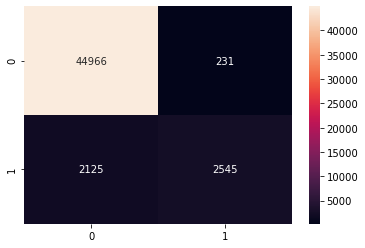

In [301]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_test_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [302]:
# import the metric
from sklearn.metrics import classification_report

# print classification report
print("Classification Report:\n\n", classification_report(Y_test, Y_test_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.95      0.99      0.97     45197
           1       0.92      0.54      0.68      4670

    accuracy                           0.95     49867
   macro avg       0.94      0.77      0.83     49867
weighted avg       0.95      0.95      0.95     49867



## Logreg + Gridsearch <a class="anchor" id="2b"></a>
[return to contents](#0)

In [303]:
from sklearn.model_selection import GridSearchCV

C1=np.logspace(0, 4, 10)
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['lbfgs','newton-cg','liblinear','sag','saga']
max_iter = [100, 1000,2500, 5000]
param_grid = dict(C=C1, penalty=penalty,solver=solver, max_iter = max_iter)

logreg=LogisticRegression(class_weight={0:0.096,1:0.904})
classifier=GridSearchCV(logreg,param_grid,cv=2)
classifier.fit(X_train, Y_train)

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFaile

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_se

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. De

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: S

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFaile

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validati

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_se

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. De

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: S

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFaile

C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.


C:\Users\kaill\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.

GridSearchCV(cv=2, error_score=nan,
             estimator=LogisticRegression(C=1.0,
                                          class_weight={0: 0.096, 1: 0.904},
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.000....78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'pe

In [304]:
print("tuned hpyerparameters :(best parameters) ",classifier.best_params_)
print("accuracy :",classifier.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.9517506999290752


Accuracy on training set :  0.9517507037384563
Accuracy on test set :  0.9527142198247338
f1-score on train set :  0.6756092702038649
f1-score on test set :  0.6834899328859061


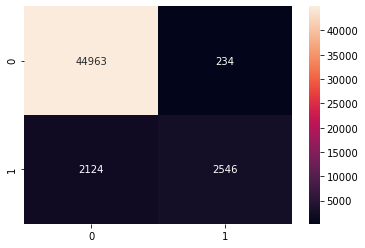

In [305]:
Y_train_pred1 = classifier.predict(X_train)
Y_test_pred1 = classifier.predict(X_test)
print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred1))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred1))
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred1))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred1))
cm = confusion_matrix(Y_test, Y_test_pred1)
sns.heatmap(cm, annot=True, fmt="d")

## Random Forest <a class="anchor" id="2c"></a>
[return to contents](#0)

Accuracy on training set :  0.9999111067213196
Accuracy on test set :  0.9571059016985181
f1-score on train set :  0.999525141138606
f1-score on test set :  0.7035343035343036


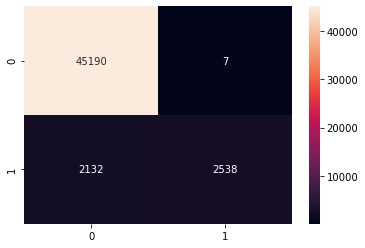

In [306]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the Random Forest classifier
RandomF1 = RandomForestClassifier(criterion="gini",class_weight={0:0.096,1:0.904})

# fit the classifier to the imbalanced data
clf1 = RandomF1.fit(X_train, Y_train)


Y_train_pred2 = clf1.predict(X_train)
Y_test_pred2 = clf1.predict(X_test)

print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred2))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred2))
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred2))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred2))
cm = confusion_matrix(Y_test, Y_test_pred2)
sns.heatmap(cm, annot=True, fmt="d")

Accuracy on training set :  0.9998518445355327
Accuracy on test set :  0.9570457416728497
f1-score on train set :  0.9992083179395156
f1-score on test set :  0.7031596452328158


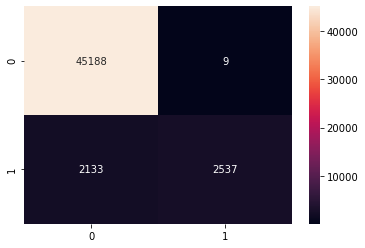

In [307]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the Random Forest classifier
RandomF2 = RandomForestClassifier(criterion="entropy",class_weight={0:0.096,1:0.904})

# fit the classifier to the imbalanced data
clf2 = RandomF2.fit(X_train, Y_train)


Y_train_pred3 = clf2.predict(X_train)
Y_test_pred3 = clf2.predict(X_test)

print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred3))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred3))
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred3))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred3))
cm = confusion_matrix(Y_test, Y_test_pred3)
sns.heatmap(cm, annot=True, fmt="d")

### Comparaison method between gini and entropy

In [308]:
count = 0
for i in range(0, len(Y_test_pred2)):
  
  if Y_test_pred2[i] != Y_test_pred3[i]:
    count+= 1
    

print("On the test set, there are {}  differently classified items".format(count))
print("Either {}%  difference".format(np.round(count/len(Y_test_pred3), 3)*100))

On the test set, there are 9  differently classified items
Either 0.0%  difference


## Random Forest + GridsearchCV <a class="anchor" id="2d"></a>
[return to contents](#0)

In [309]:
param = {"n_estimators": np.arange(10,50),
        "max_depth": np.arange(1,10),
       "min_samples_split":np.arange(2,10)}

In [311]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(n_jobs = -1,criterion="gini",class_weight={0:0.096,1:0.904})
grid1 = GridSearchCV(n_jobs = -1, estimator = rf, param_grid=param)

# CAREFUL TIME TO RUN THE BELOW IS VERY VERY LONG 
grid1.fit(X_train,Y_train)


Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:   40.2s
[Paralle

[Parallel(n_jobs=-1)]: Done 265 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.2min
[Paralle

[Parallel(n_jobs=-1)]: Done 398 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 399 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 401 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 403 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 406 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 407 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 409 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 411 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed:  1.9min
[Paralle

[Parallel(n_jobs=-1)]: Done 531 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 532 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 533 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 534 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 535 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 537 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 539 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 541 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 542 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 543 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 545 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed:  2.4min
[Paralle

[Parallel(n_jobs=-1)]: Done 664 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 665 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 666 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 667 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 669 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 670 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 671 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 673 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 675 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 677 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 679 tasks      | elapsed:  3.0min
[Paralle

[Parallel(n_jobs=-1)]: Done 797 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 798 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 799 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 800 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 801 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 802 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 803 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 804 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 805 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 806 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 807 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 809 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 810 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 811 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:  3.6min
[Paralle

[Parallel(n_jobs=-1)]: Done 932 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 933 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 934 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 935 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 936 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 937 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 938 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 939 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 940 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 942 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 943 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 945 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 946 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 947 tasks      | elapsed:  4.1min
[Paralle

[Parallel(n_jobs=-1)]: Done 1064 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1065 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1066 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1067 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1068 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1069 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1070 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1071 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1073 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1074 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1075 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1076 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1077 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1078 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1079 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1195 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1196 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1197 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1198 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1199 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1201 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1203 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1204 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1205 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1206 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1207 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1208 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1209 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1210 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1326 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1327 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1328 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1329 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1330 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1331 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1332 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1333 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1334 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1335 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1336 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1337 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1338 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1339 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1340 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1341 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1457 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1458 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1459 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1460 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1461 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1462 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1463 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1464 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1465 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1466 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1467 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1468 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1469 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1470 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1471 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1472 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1588 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 1589 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 1590 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 1591 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 1592 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1593 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1594 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1595 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1596 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1597 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1598 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1599 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1600 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1601 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1602 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1603 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1719 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1720 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1721 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1722 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1723 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1724 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1725 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1726 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1727 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1728 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1729 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1730 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1731 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1732 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1733 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1734 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1851 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1852 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1853 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1854 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1855 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1856 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1857 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1858 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1859 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1860 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1861 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1862 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1863 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1864 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1865 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1866 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1983 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 1984 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 1985 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 1986 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 1987 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 1988 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 1989 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1990 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1991 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1992 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1993 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1994 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1995 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1996 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1997 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1998 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2114 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 2115 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 2116 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 2117 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 2118 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 2119 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 2120 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 2121 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 2122 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 2123 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 2124 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 2125 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 2126 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 2127 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 2128 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 2129 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2246 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 2247 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 2248 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 2249 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 2250 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 2251 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 2252 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 2253 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 2254 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 2255 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 2256 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 2257 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 2258 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 2259 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 2260 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 2261 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2377 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 2378 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 2379 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 2380 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 2381 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 2382 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 2383 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 2384 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 2385 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 2386 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 2387 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 2388 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 2389 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 2390 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 2391 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 2392 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2508 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 2509 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 2510 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 2511 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 2512 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 2513 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 2514 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 2515 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 2516 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 2517 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 2518 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 2519 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 2520 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 2521 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 2522 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 2523 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2640 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 2641 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 2642 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 2643 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 2644 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 2645 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 2646 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 2647 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 2648 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 2649 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 2650 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 2651 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 2652 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 2653 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 2654 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 2655 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2771 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 2772 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 2773 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 2774 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 2775 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 2776 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 2777 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 2778 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 2779 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 2780 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 2781 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 2782 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 2783 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 2784 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 2785 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 2786 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2902 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 2903 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 2904 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 2905 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 2906 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 2907 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 2908 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 2909 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 2910 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 2911 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 2912 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 2913 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 2914 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 2915 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 2916 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 2917 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3033 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 3034 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 3035 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 3036 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 3037 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 3038 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 3039 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 3041 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 3042 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 3043 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 3044 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 3045 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 3046 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 3047 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 3048 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3166 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 3167 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 3169 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 3170 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 3171 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 3172 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 3173 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 3174 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 3175 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 3177 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 3178 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 3179 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 3180 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 3181 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3297 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 3298 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 3299 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 3300 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 3301 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 3302 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 3303 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 3304 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 3305 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 3306 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 3307 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 3308 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 3309 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 3310 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 3311 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 3312 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3430 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 3431 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 3432 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 3433 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 3434 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 3435 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 3436 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 3437 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 3438 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 3439 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 3440 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 3441 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 3442 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 3443 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 3444 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 3445 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3562 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 3563 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 3564 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 3565 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 3566 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 3567 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 3568 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 3569 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 3570 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 3571 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 3572 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 3573 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 3574 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 3575 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 3576 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 3577 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3693 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 3694 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 3695 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 3696 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 3697 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 3698 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 3699 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 3700 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 3701 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 3702 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 3703 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 3704 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 3705 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 3706 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 3707 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 3708 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3827 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 3828 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 3829 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 3830 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 3831 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 3832 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 3833 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 3834 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 3835 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 3836 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 3837 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 3838 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 3839 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 3840 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 3841 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 3842 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3960 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 3961 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 3962 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 3963 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 3964 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 3965 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 3966 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 3967 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 3968 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 3969 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 3970 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 3971 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 3972 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 3973 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 3974 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 3975 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 4091 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 4092 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 4093 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 4094 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 4095 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 4096 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 4097 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 4098 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 4099 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 4100 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 4101 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 4102 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 4103 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 4104 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 4105 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 4106 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 4222 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 4223 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 4224 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 4225 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 4226 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 4227 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 4228 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 4229 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 4230 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 4231 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 4232 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 4233 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 4234 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 4235 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 4236 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 4237 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 4353 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 4354 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 4355 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 4356 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 4357 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 4358 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 4359 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 4360 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 4361 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 4362 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 4363 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 4364 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 4365 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 4366 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 4367 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 4368 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 4485 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 4486 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 4487 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 4488 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 4489 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 4490 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 4491 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 4492 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 4493 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 4494 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 4495 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 4496 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 4497 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 4498 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 4499 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 4500 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 4617 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 4618 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 4619 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 4620 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 4621 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 4622 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 4623 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 4624 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 4625 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 4626 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 4627 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 4628 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 4629 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 4630 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 4631 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 4632 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 4750 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 4751 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 4752 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 4753 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 4754 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 4755 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 4756 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 4757 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 4758 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 4759 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 4760 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 4761 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 4762 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 4763 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 4764 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 4765 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 4881 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 4882 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 4883 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 4884 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 4886 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 4887 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 4888 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 4889 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 4890 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 4891 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 4892 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 4894 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 4895 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 4896 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 5014 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 5015 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 5016 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 5017 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 5018 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 5019 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 5020 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 5021 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 5022 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 5023 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 5024 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 5025 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 5026 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 5027 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 5028 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 5029 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 5146 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 5147 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 5148 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 5149 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 5150 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 5151 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 5152 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 5153 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 5154 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 5155 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 5156 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 5157 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 5158 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 5159 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 5160 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 5161 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 5278 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 5279 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 5280 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 5281 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 5282 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 5283 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 5284 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 5285 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 5286 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 5287 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 5288 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 5289 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 5290 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 5291 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 5292 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 5293 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 5409 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 5410 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 5411 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 5412 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 5413 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 5414 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 5415 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 5416 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 5417 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done 5418 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done 5419 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done 5420 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done 5421 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done 5422 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done 5423 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done 5424 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 5540 tasks      | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done 5541 tasks      | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done 5542 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 5543 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 5544 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 5545 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 5546 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 5547 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 5548 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 5549 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 5550 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 5551 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 5552 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 5553 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 5554 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 5555 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 5672 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 5673 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 5674 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 5675 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 5676 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 5677 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 5678 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 5679 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 5680 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 5681 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 5682 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 5683 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 5684 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 5685 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 5686 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 5687 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 5804 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 5805 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 5806 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 5807 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 5809 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 5810 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 5811 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 5812 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 5813 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 5814 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 5815 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 5817 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 5818 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 5819 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 5935 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 5936 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 5937 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 5938 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 5939 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 5940 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 5941 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 5942 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 5943 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 5944 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 5945 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 5946 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 5947 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 5948 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 5949 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 5950 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 6067 tasks      | elapsed: 36.5min
[Parallel(n_jobs=-1)]: Done 6068 tasks      | elapsed: 36.5min
[Parallel(n_jobs=-1)]: Done 6069 tasks      | elapsed: 36.5min
[Parallel(n_jobs=-1)]: Done 6070 tasks      | elapsed: 36.5min
[Parallel(n_jobs=-1)]: Done 6071 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 6072 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 6073 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 6074 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 6075 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 6076 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 6077 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 6078 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 6079 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 6080 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 6081 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 6082 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 6198 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 6199 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 6200 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 6201 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 6202 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 6203 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 6204 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 6205 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 6206 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 6207 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 6208 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 6209 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 6210 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 6211 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 6212 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 6213 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 6331 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done 6332 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done 6333 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 6334 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 6335 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 6336 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 6337 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 6338 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 6339 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 6340 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 6341 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 6342 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 6343 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 6344 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 6345 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 6346 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 6464 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 6465 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 6466 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 6467 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 6468 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 6469 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 6470 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 6471 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 6472 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 6473 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 6474 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 6475 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 6476 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 6477 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 6478 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 6479 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 6595 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 6596 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 6597 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 6598 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 6599 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 6600 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 6601 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 6602 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 6603 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 6604 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 6605 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 6606 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 6607 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 6608 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 6609 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 6610 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 6726 tasks      | elapsed: 41.6min
[Parallel(n_jobs=-1)]: Done 6727 tasks      | elapsed: 41.6min
[Parallel(n_jobs=-1)]: Done 6728 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 6729 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 6730 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 6731 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 6732 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 6733 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 6734 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 6735 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 6736 tasks      | elapsed: 41.8min
[Parallel(n_jobs=-1)]: Done 6737 tasks      | elapsed: 41.8min
[Parallel(n_jobs=-1)]: Done 6738 tasks      | elapsed: 41.8min
[Parallel(n_jobs=-1)]: Done 6739 tasks      | elapsed: 41.8min
[Parallel(n_jobs=-1)]: Done 6740 tasks      | elapsed: 41.8min
[Parallel(n_jobs=-1)]: Done 6741 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 6858 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 6859 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 6860 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 6861 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 6862 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 6863 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 6864 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 6865 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 6866 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 6867 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 6868 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 6869 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 6870 tasks      | elapsed: 42.9min
[Parallel(n_jobs=-1)]: Done 6871 tasks      | elapsed: 42.9min
[Parallel(n_jobs=-1)]: Done 6872 tasks      | elapsed: 42.9min
[Parallel(n_jobs=-1)]: Done 6873 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 6989 tasks      | elapsed: 44.1min
[Parallel(n_jobs=-1)]: Done 6990 tasks      | elapsed: 44.1min
[Parallel(n_jobs=-1)]: Done 6991 tasks      | elapsed: 44.1min
[Parallel(n_jobs=-1)]: Done 6992 tasks      | elapsed: 44.1min
[Parallel(n_jobs=-1)]: Done 6993 tasks      | elapsed: 44.1min
[Parallel(n_jobs=-1)]: Done 6994 tasks      | elapsed: 44.1min
[Parallel(n_jobs=-1)]: Done 6995 tasks      | elapsed: 44.1min
[Parallel(n_jobs=-1)]: Done 6996 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 6997 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 6998 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 6999 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 7000 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 7001 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 7002 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 7003 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 7004 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 7120 tasks      | elapsed: 44.9min
[Parallel(n_jobs=-1)]: Done 7121 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 7122 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 7123 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 7124 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 7125 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 7126 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 7127 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 7128 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 7129 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 7130 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 7131 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done 7132 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done 7133 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done 7134 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done 7135 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 7251 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 7252 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 7253 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 7254 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 7255 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 7256 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 7257 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 7258 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 7259 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 7260 tasks      | elapsed: 46.2min
[Parallel(n_jobs=-1)]: Done 7261 tasks      | elapsed: 46.2min
[Parallel(n_jobs=-1)]: Done 7262 tasks      | elapsed: 46.2min
[Parallel(n_jobs=-1)]: Done 7263 tasks      | elapsed: 46.2min
[Parallel(n_jobs=-1)]: Done 7264 tasks      | elapsed: 46.2min
[Parallel(n_jobs=-1)]: Done 7265 tasks      | elapsed: 46.2min
[Parallel(n_jobs=-1)]: Done 7266 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 7383 tasks      | elapsed: 47.3min
[Parallel(n_jobs=-1)]: Done 7384 tasks      | elapsed: 47.4min
[Parallel(n_jobs=-1)]: Done 7385 tasks      | elapsed: 47.4min
[Parallel(n_jobs=-1)]: Done 7386 tasks      | elapsed: 47.4min
[Parallel(n_jobs=-1)]: Done 7387 tasks      | elapsed: 47.4min
[Parallel(n_jobs=-1)]: Done 7388 tasks      | elapsed: 47.4min
[Parallel(n_jobs=-1)]: Done 7389 tasks      | elapsed: 47.4min
[Parallel(n_jobs=-1)]: Done 7390 tasks      | elapsed: 47.4min
[Parallel(n_jobs=-1)]: Done 7391 tasks      | elapsed: 47.5min
[Parallel(n_jobs=-1)]: Done 7392 tasks      | elapsed: 47.5min
[Parallel(n_jobs=-1)]: Done 7393 tasks      | elapsed: 47.5min
[Parallel(n_jobs=-1)]: Done 7394 tasks      | elapsed: 47.5min
[Parallel(n_jobs=-1)]: Done 7395 tasks      | elapsed: 47.5min
[Parallel(n_jobs=-1)]: Done 7396 tasks      | elapsed: 47.5min
[Parallel(n_jobs=-1)]: Done 7397 tasks      | elapsed: 47.5min
[Parallel(n_jobs=-1)]: Done 7398 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 7514 tasks      | elapsed: 48.3min
[Parallel(n_jobs=-1)]: Done 7515 tasks      | elapsed: 48.3min
[Parallel(n_jobs=-1)]: Done 7516 tasks      | elapsed: 48.3min
[Parallel(n_jobs=-1)]: Done 7517 tasks      | elapsed: 48.3min
[Parallel(n_jobs=-1)]: Done 7518 tasks      | elapsed: 48.3min
[Parallel(n_jobs=-1)]: Done 7519 tasks      | elapsed: 48.3min
[Parallel(n_jobs=-1)]: Done 7520 tasks      | elapsed: 48.3min
[Parallel(n_jobs=-1)]: Done 7521 tasks      | elapsed: 48.3min
[Parallel(n_jobs=-1)]: Done 7522 tasks      | elapsed: 48.3min
[Parallel(n_jobs=-1)]: Done 7523 tasks      | elapsed: 48.3min
[Parallel(n_jobs=-1)]: Done 7524 tasks      | elapsed: 48.4min
[Parallel(n_jobs=-1)]: Done 7525 tasks      | elapsed: 48.4min
[Parallel(n_jobs=-1)]: Done 7526 tasks      | elapsed: 48.4min
[Parallel(n_jobs=-1)]: Done 7527 tasks      | elapsed: 48.4min
[Parallel(n_jobs=-1)]: Done 7528 tasks      | elapsed: 48.4min
[Parallel(n_jobs=-1)]: Done 7529 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 7646 tasks      | elapsed: 49.5min
[Parallel(n_jobs=-1)]: Done 7647 tasks      | elapsed: 49.5min
[Parallel(n_jobs=-1)]: Done 7648 tasks      | elapsed: 49.5min
[Parallel(n_jobs=-1)]: Done 7649 tasks      | elapsed: 49.5min
[Parallel(n_jobs=-1)]: Done 7650 tasks      | elapsed: 49.5min
[Parallel(n_jobs=-1)]: Done 7651 tasks      | elapsed: 49.5min
[Parallel(n_jobs=-1)]: Done 7652 tasks      | elapsed: 49.5min
[Parallel(n_jobs=-1)]: Done 7653 tasks      | elapsed: 49.5min
[Parallel(n_jobs=-1)]: Done 7654 tasks      | elapsed: 49.5min
[Parallel(n_jobs=-1)]: Done 7655 tasks      | elapsed: 49.5min
[Parallel(n_jobs=-1)]: Done 7656 tasks      | elapsed: 49.5min
[Parallel(n_jobs=-1)]: Done 7657 tasks      | elapsed: 49.5min
[Parallel(n_jobs=-1)]: Done 7658 tasks      | elapsed: 49.5min
[Parallel(n_jobs=-1)]: Done 7659 tasks      | elapsed: 49.5min
[Parallel(n_jobs=-1)]: Done 7660 tasks      | elapsed: 49.5min
[Parallel(n_jobs=-1)]: Done 7661 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 7777 tasks      | elapsed: 50.7min
[Parallel(n_jobs=-1)]: Done 7778 tasks      | elapsed: 50.7min
[Parallel(n_jobs=-1)]: Done 7779 tasks      | elapsed: 50.7min
[Parallel(n_jobs=-1)]: Done 7780 tasks      | elapsed: 50.7min
[Parallel(n_jobs=-1)]: Done 7781 tasks      | elapsed: 50.7min
[Parallel(n_jobs=-1)]: Done 7782 tasks      | elapsed: 50.7min
[Parallel(n_jobs=-1)]: Done 7783 tasks      | elapsed: 50.7min
[Parallel(n_jobs=-1)]: Done 7784 tasks      | elapsed: 50.7min
[Parallel(n_jobs=-1)]: Done 7785 tasks      | elapsed: 50.8min
[Parallel(n_jobs=-1)]: Done 7786 tasks      | elapsed: 50.8min
[Parallel(n_jobs=-1)]: Done 7787 tasks      | elapsed: 50.8min
[Parallel(n_jobs=-1)]: Done 7788 tasks      | elapsed: 50.8min
[Parallel(n_jobs=-1)]: Done 7789 tasks      | elapsed: 50.8min
[Parallel(n_jobs=-1)]: Done 7790 tasks      | elapsed: 50.8min
[Parallel(n_jobs=-1)]: Done 7791 tasks      | elapsed: 50.8min
[Parallel(n_jobs=-1)]: Done 7792 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 7908 tasks      | elapsed: 51.6min
[Parallel(n_jobs=-1)]: Done 7909 tasks      | elapsed: 51.6min
[Parallel(n_jobs=-1)]: Done 7910 tasks      | elapsed: 51.6min
[Parallel(n_jobs=-1)]: Done 7911 tasks      | elapsed: 51.6min
[Parallel(n_jobs=-1)]: Done 7912 tasks      | elapsed: 51.6min
[Parallel(n_jobs=-1)]: Done 7913 tasks      | elapsed: 51.6min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed: 51.6min
[Parallel(n_jobs=-1)]: Done 7915 tasks      | elapsed: 51.6min
[Parallel(n_jobs=-1)]: Done 7916 tasks      | elapsed: 51.7min
[Parallel(n_jobs=-1)]: Done 7917 tasks      | elapsed: 51.7min
[Parallel(n_jobs=-1)]: Done 7918 tasks      | elapsed: 51.7min
[Parallel(n_jobs=-1)]: Done 7919 tasks      | elapsed: 51.7min
[Parallel(n_jobs=-1)]: Done 7920 tasks      | elapsed: 51.7min
[Parallel(n_jobs=-1)]: Done 7921 tasks      | elapsed: 51.7min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 51.7min
[Parallel(n_jobs=-1)]: Done 7923 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 8040 tasks      | elapsed: 52.8min
[Parallel(n_jobs=-1)]: Done 8041 tasks      | elapsed: 52.8min
[Parallel(n_jobs=-1)]: Done 8042 tasks      | elapsed: 52.8min
[Parallel(n_jobs=-1)]: Done 8043 tasks      | elapsed: 52.8min
[Parallel(n_jobs=-1)]: Done 8044 tasks      | elapsed: 52.8min
[Parallel(n_jobs=-1)]: Done 8045 tasks      | elapsed: 52.8min
[Parallel(n_jobs=-1)]: Done 8046 tasks      | elapsed: 52.8min
[Parallel(n_jobs=-1)]: Done 8047 tasks      | elapsed: 52.8min
[Parallel(n_jobs=-1)]: Done 8048 tasks      | elapsed: 52.9min
[Parallel(n_jobs=-1)]: Done 8049 tasks      | elapsed: 52.9min
[Parallel(n_jobs=-1)]: Done 8050 tasks      | elapsed: 52.9min
[Parallel(n_jobs=-1)]: Done 8051 tasks      | elapsed: 52.9min
[Parallel(n_jobs=-1)]: Done 8052 tasks      | elapsed: 52.9min
[Parallel(n_jobs=-1)]: Done 8053 tasks      | elapsed: 52.9min
[Parallel(n_jobs=-1)]: Done 8054 tasks      | elapsed: 52.9min
[Parallel(n_jobs=-1)]: Done 8055 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 8171 tasks      | elapsed: 54.1min
[Parallel(n_jobs=-1)]: Done 8172 tasks      | elapsed: 54.1min
[Parallel(n_jobs=-1)]: Done 8173 tasks      | elapsed: 54.1min
[Parallel(n_jobs=-1)]: Done 8174 tasks      | elapsed: 54.2min
[Parallel(n_jobs=-1)]: Done 8175 tasks      | elapsed: 54.2min
[Parallel(n_jobs=-1)]: Done 8176 tasks      | elapsed: 54.2min
[Parallel(n_jobs=-1)]: Done 8177 tasks      | elapsed: 54.2min
[Parallel(n_jobs=-1)]: Done 8178 tasks      | elapsed: 54.2min
[Parallel(n_jobs=-1)]: Done 8179 tasks      | elapsed: 54.2min
[Parallel(n_jobs=-1)]: Done 8180 tasks      | elapsed: 54.2min
[Parallel(n_jobs=-1)]: Done 8181 tasks      | elapsed: 54.3min
[Parallel(n_jobs=-1)]: Done 8182 tasks      | elapsed: 54.3min
[Parallel(n_jobs=-1)]: Done 8183 tasks      | elapsed: 54.3min
[Parallel(n_jobs=-1)]: Done 8184 tasks      | elapsed: 54.3min
[Parallel(n_jobs=-1)]: Done 8185 tasks      | elapsed: 54.3min
[Parallel(n_jobs=-1)]: Done 8186 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 8302 tasks      | elapsed: 55.2min
[Parallel(n_jobs=-1)]: Done 8303 tasks      | elapsed: 55.2min
[Parallel(n_jobs=-1)]: Done 8304 tasks      | elapsed: 55.2min
[Parallel(n_jobs=-1)]: Done 8305 tasks      | elapsed: 55.2min
[Parallel(n_jobs=-1)]: Done 8306 tasks      | elapsed: 55.2min
[Parallel(n_jobs=-1)]: Done 8307 tasks      | elapsed: 55.2min
[Parallel(n_jobs=-1)]: Done 8308 tasks      | elapsed: 55.2min
[Parallel(n_jobs=-1)]: Done 8309 tasks      | elapsed: 55.2min
[Parallel(n_jobs=-1)]: Done 8310 tasks      | elapsed: 55.3min
[Parallel(n_jobs=-1)]: Done 8311 tasks      | elapsed: 55.3min
[Parallel(n_jobs=-1)]: Done 8312 tasks      | elapsed: 55.3min
[Parallel(n_jobs=-1)]: Done 8313 tasks      | elapsed: 55.3min
[Parallel(n_jobs=-1)]: Done 8314 tasks      | elapsed: 55.3min
[Parallel(n_jobs=-1)]: Done 8315 tasks      | elapsed: 55.3min
[Parallel(n_jobs=-1)]: Done 8316 tasks      | elapsed: 55.3min
[Parallel(n_jobs=-1)]: Done 8317 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 8435 tasks      | elapsed: 56.6min
[Parallel(n_jobs=-1)]: Done 8436 tasks      | elapsed: 56.6min
[Parallel(n_jobs=-1)]: Done 8437 tasks      | elapsed: 56.6min
[Parallel(n_jobs=-1)]: Done 8438 tasks      | elapsed: 56.6min
[Parallel(n_jobs=-1)]: Done 8439 tasks      | elapsed: 56.6min
[Parallel(n_jobs=-1)]: Done 8440 tasks      | elapsed: 56.6min
[Parallel(n_jobs=-1)]: Done 8441 tasks      | elapsed: 56.6min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 56.6min
[Parallel(n_jobs=-1)]: Done 8443 tasks      | elapsed: 56.6min
[Parallel(n_jobs=-1)]: Done 8444 tasks      | elapsed: 56.6min
[Parallel(n_jobs=-1)]: Done 8445 tasks      | elapsed: 56.6min
[Parallel(n_jobs=-1)]: Done 8446 tasks      | elapsed: 56.6min
[Parallel(n_jobs=-1)]: Done 8447 tasks      | elapsed: 56.6min
[Parallel(n_jobs=-1)]: Done 8448 tasks      | elapsed: 56.6min
[Parallel(n_jobs=-1)]: Done 8449 tasks      | elapsed: 56.6min
[Parallel(n_jobs=-1)]: Done 8450 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 8566 tasks      | elapsed: 57.8min
[Parallel(n_jobs=-1)]: Done 8567 tasks      | elapsed: 57.9min
[Parallel(n_jobs=-1)]: Done 8568 tasks      | elapsed: 57.9min
[Parallel(n_jobs=-1)]: Done 8569 tasks      | elapsed: 57.9min
[Parallel(n_jobs=-1)]: Done 8570 tasks      | elapsed: 57.9min
[Parallel(n_jobs=-1)]: Done 8571 tasks      | elapsed: 57.9min
[Parallel(n_jobs=-1)]: Done 8572 tasks      | elapsed: 57.9min
[Parallel(n_jobs=-1)]: Done 8573 tasks      | elapsed: 57.9min
[Parallel(n_jobs=-1)]: Done 8574 tasks      | elapsed: 57.9min
[Parallel(n_jobs=-1)]: Done 8575 tasks      | elapsed: 58.0min
[Parallel(n_jobs=-1)]: Done 8576 tasks      | elapsed: 58.0min
[Parallel(n_jobs=-1)]: Done 8577 tasks      | elapsed: 58.0min
[Parallel(n_jobs=-1)]: Done 8578 tasks      | elapsed: 58.0min
[Parallel(n_jobs=-1)]: Done 8579 tasks      | elapsed: 58.0min
[Parallel(n_jobs=-1)]: Done 8580 tasks      | elapsed: 58.0min
[Parallel(n_jobs=-1)]: Done 8581 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 8698 tasks      | elapsed: 58.9min
[Parallel(n_jobs=-1)]: Done 8699 tasks      | elapsed: 58.9min
[Parallel(n_jobs=-1)]: Done 8700 tasks      | elapsed: 59.0min
[Parallel(n_jobs=-1)]: Done 8701 tasks      | elapsed: 59.0min
[Parallel(n_jobs=-1)]: Done 8702 tasks      | elapsed: 59.0min
[Parallel(n_jobs=-1)]: Done 8703 tasks      | elapsed: 59.0min
[Parallel(n_jobs=-1)]: Done 8704 tasks      | elapsed: 59.0min
[Parallel(n_jobs=-1)]: Done 8705 tasks      | elapsed: 59.0min
[Parallel(n_jobs=-1)]: Done 8706 tasks      | elapsed: 59.0min
[Parallel(n_jobs=-1)]: Done 8707 tasks      | elapsed: 59.0min
[Parallel(n_jobs=-1)]: Done 8708 tasks      | elapsed: 59.0min
[Parallel(n_jobs=-1)]: Done 8709 tasks      | elapsed: 59.0min
[Parallel(n_jobs=-1)]: Done 8710 tasks      | elapsed: 59.0min
[Parallel(n_jobs=-1)]: Done 8711 tasks      | elapsed: 59.1min
[Parallel(n_jobs=-1)]: Done 8712 tasks      | elapsed: 59.1min
[Parallel(n_jobs=-1)]: Done 8713 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 8830 tasks      | elapsed: 60.3min
[Parallel(n_jobs=-1)]: Done 8831 tasks      | elapsed: 60.3min
[Parallel(n_jobs=-1)]: Done 8832 tasks      | elapsed: 60.3min
[Parallel(n_jobs=-1)]: Done 8833 tasks      | elapsed: 60.3min
[Parallel(n_jobs=-1)]: Done 8834 tasks      | elapsed: 60.3min
[Parallel(n_jobs=-1)]: Done 8835 tasks      | elapsed: 60.3min
[Parallel(n_jobs=-1)]: Done 8836 tasks      | elapsed: 60.3min
[Parallel(n_jobs=-1)]: Done 8837 tasks      | elapsed: 60.3min
[Parallel(n_jobs=-1)]: Done 8838 tasks      | elapsed: 60.4min
[Parallel(n_jobs=-1)]: Done 8839 tasks      | elapsed: 60.4min
[Parallel(n_jobs=-1)]: Done 8840 tasks      | elapsed: 60.4min
[Parallel(n_jobs=-1)]: Done 8841 tasks      | elapsed: 60.4min
[Parallel(n_jobs=-1)]: Done 8842 tasks      | elapsed: 60.4min
[Parallel(n_jobs=-1)]: Done 8843 tasks      | elapsed: 60.4min
[Parallel(n_jobs=-1)]: Done 8844 tasks      | elapsed: 60.4min
[Parallel(n_jobs=-1)]: Done 8845 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 8961 tasks      | elapsed: 61.6min
[Parallel(n_jobs=-1)]: Done 8962 tasks      | elapsed: 61.6min
[Parallel(n_jobs=-1)]: Done 8963 tasks      | elapsed: 61.6min
[Parallel(n_jobs=-1)]: Done 8964 tasks      | elapsed: 61.6min
[Parallel(n_jobs=-1)]: Done 8965 tasks      | elapsed: 61.6min
[Parallel(n_jobs=-1)]: Done 8966 tasks      | elapsed: 61.6min
[Parallel(n_jobs=-1)]: Done 8967 tasks      | elapsed: 61.6min
[Parallel(n_jobs=-1)]: Done 8968 tasks      | elapsed: 61.6min
[Parallel(n_jobs=-1)]: Done 8969 tasks      | elapsed: 61.7min
[Parallel(n_jobs=-1)]: Done 8970 tasks      | elapsed: 61.7min
[Parallel(n_jobs=-1)]: Done 8971 tasks      | elapsed: 61.7min
[Parallel(n_jobs=-1)]: Done 8972 tasks      | elapsed: 61.7min
[Parallel(n_jobs=-1)]: Done 8973 tasks      | elapsed: 61.7min
[Parallel(n_jobs=-1)]: Done 8974 tasks      | elapsed: 61.7min
[Parallel(n_jobs=-1)]: Done 8975 tasks      | elapsed: 61.7min
[Parallel(n_jobs=-1)]: Done 8976 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 9092 tasks      | elapsed: 62.7min
[Parallel(n_jobs=-1)]: Done 9093 tasks      | elapsed: 62.7min
[Parallel(n_jobs=-1)]: Done 9094 tasks      | elapsed: 62.7min
[Parallel(n_jobs=-1)]: Done 9095 tasks      | elapsed: 62.7min
[Parallel(n_jobs=-1)]: Done 9096 tasks      | elapsed: 62.7min
[Parallel(n_jobs=-1)]: Done 9097 tasks      | elapsed: 62.7min
[Parallel(n_jobs=-1)]: Done 9098 tasks      | elapsed: 62.7min
[Parallel(n_jobs=-1)]: Done 9099 tasks      | elapsed: 62.7min
[Parallel(n_jobs=-1)]: Done 9100 tasks      | elapsed: 62.7min
[Parallel(n_jobs=-1)]: Done 9101 tasks      | elapsed: 62.7min
[Parallel(n_jobs=-1)]: Done 9102 tasks      | elapsed: 62.8min
[Parallel(n_jobs=-1)]: Done 9103 tasks      | elapsed: 62.8min
[Parallel(n_jobs=-1)]: Done 9104 tasks      | elapsed: 62.8min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | elapsed: 62.8min
[Parallel(n_jobs=-1)]: Done 9106 tasks      | elapsed: 62.8min
[Parallel(n_jobs=-1)]: Done 9107 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 9223 tasks      | elapsed: 64.1min
[Parallel(n_jobs=-1)]: Done 9224 tasks      | elapsed: 64.1min
[Parallel(n_jobs=-1)]: Done 9225 tasks      | elapsed: 64.1min
[Parallel(n_jobs=-1)]: Done 9226 tasks      | elapsed: 64.1min
[Parallel(n_jobs=-1)]: Done 9227 tasks      | elapsed: 64.1min
[Parallel(n_jobs=-1)]: Done 9228 tasks      | elapsed: 64.1min
[Parallel(n_jobs=-1)]: Done 9229 tasks      | elapsed: 64.1min
[Parallel(n_jobs=-1)]: Done 9230 tasks      | elapsed: 64.1min
[Parallel(n_jobs=-1)]: Done 9231 tasks      | elapsed: 64.1min
[Parallel(n_jobs=-1)]: Done 9232 tasks      | elapsed: 64.1min
[Parallel(n_jobs=-1)]: Done 9233 tasks      | elapsed: 64.1min
[Parallel(n_jobs=-1)]: Done 9234 tasks      | elapsed: 64.1min
[Parallel(n_jobs=-1)]: Done 9235 tasks      | elapsed: 64.1min
[Parallel(n_jobs=-1)]: Done 9236 tasks      | elapsed: 64.1min
[Parallel(n_jobs=-1)]: Done 9237 tasks      | elapsed: 64.1min
[Parallel(n_jobs=-1)]: Done 9238 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 9354 tasks      | elapsed: 65.2min
[Parallel(n_jobs=-1)]: Done 9355 tasks      | elapsed: 65.3min
[Parallel(n_jobs=-1)]: Done 9356 tasks      | elapsed: 65.3min
[Parallel(n_jobs=-1)]: Done 9357 tasks      | elapsed: 65.3min
[Parallel(n_jobs=-1)]: Done 9358 tasks      | elapsed: 65.3min
[Parallel(n_jobs=-1)]: Done 9359 tasks      | elapsed: 65.3min
[Parallel(n_jobs=-1)]: Done 9360 tasks      | elapsed: 65.3min
[Parallel(n_jobs=-1)]: Done 9361 tasks      | elapsed: 65.3min
[Parallel(n_jobs=-1)]: Done 9362 tasks      | elapsed: 65.4min
[Parallel(n_jobs=-1)]: Done 9363 tasks      | elapsed: 65.4min
[Parallel(n_jobs=-1)]: Done 9364 tasks      | elapsed: 65.4min
[Parallel(n_jobs=-1)]: Done 9365 tasks      | elapsed: 65.4min
[Parallel(n_jobs=-1)]: Done 9366 tasks      | elapsed: 65.4min
[Parallel(n_jobs=-1)]: Done 9367 tasks      | elapsed: 65.4min
[Parallel(n_jobs=-1)]: Done 9368 tasks      | elapsed: 65.5min
[Parallel(n_jobs=-1)]: Done 9369 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 9485 tasks      | elapsed: 66.5min
[Parallel(n_jobs=-1)]: Done 9486 tasks      | elapsed: 66.5min
[Parallel(n_jobs=-1)]: Done 9487 tasks      | elapsed: 66.5min
[Parallel(n_jobs=-1)]: Done 9488 tasks      | elapsed: 66.5min
[Parallel(n_jobs=-1)]: Done 9489 tasks      | elapsed: 66.5min
[Parallel(n_jobs=-1)]: Done 9490 tasks      | elapsed: 66.5min
[Parallel(n_jobs=-1)]: Done 9491 tasks      | elapsed: 66.5min
[Parallel(n_jobs=-1)]: Done 9492 tasks      | elapsed: 66.5min
[Parallel(n_jobs=-1)]: Done 9493 tasks      | elapsed: 66.5min
[Parallel(n_jobs=-1)]: Done 9494 tasks      | elapsed: 66.5min
[Parallel(n_jobs=-1)]: Done 9495 tasks      | elapsed: 66.6min
[Parallel(n_jobs=-1)]: Done 9496 tasks      | elapsed: 66.6min
[Parallel(n_jobs=-1)]: Done 9497 tasks      | elapsed: 66.6min
[Parallel(n_jobs=-1)]: Done 9498 tasks      | elapsed: 66.6min
[Parallel(n_jobs=-1)]: Done 9499 tasks      | elapsed: 66.6min
[Parallel(n_jobs=-1)]: Done 9500 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 9616 tasks      | elapsed: 67.9min
[Parallel(n_jobs=-1)]: Done 9617 tasks      | elapsed: 67.9min
[Parallel(n_jobs=-1)]: Done 9618 tasks      | elapsed: 67.9min
[Parallel(n_jobs=-1)]: Done 9619 tasks      | elapsed: 67.9min
[Parallel(n_jobs=-1)]: Done 9620 tasks      | elapsed: 67.9min
[Parallel(n_jobs=-1)]: Done 9621 tasks      | elapsed: 67.9min
[Parallel(n_jobs=-1)]: Done 9622 tasks      | elapsed: 67.9min
[Parallel(n_jobs=-1)]: Done 9623 tasks      | elapsed: 68.0min
[Parallel(n_jobs=-1)]: Done 9624 tasks      | elapsed: 68.0min
[Parallel(n_jobs=-1)]: Done 9625 tasks      | elapsed: 68.0min
[Parallel(n_jobs=-1)]: Done 9626 tasks      | elapsed: 68.0min
[Parallel(n_jobs=-1)]: Done 9627 tasks      | elapsed: 68.0min
[Parallel(n_jobs=-1)]: Done 9628 tasks      | elapsed: 68.0min
[Parallel(n_jobs=-1)]: Done 9629 tasks      | elapsed: 68.0min
[Parallel(n_jobs=-1)]: Done 9630 tasks      | elapsed: 68.0min
[Parallel(n_jobs=-1)]: Done 9631 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 9747 tasks      | elapsed: 69.2min
[Parallel(n_jobs=-1)]: Done 9748 tasks      | elapsed: 69.2min
[Parallel(n_jobs=-1)]: Done 9749 tasks      | elapsed: 69.2min
[Parallel(n_jobs=-1)]: Done 9750 tasks      | elapsed: 69.2min
[Parallel(n_jobs=-1)]: Done 9751 tasks      | elapsed: 69.2min
[Parallel(n_jobs=-1)]: Done 9752 tasks      | elapsed: 69.2min
[Parallel(n_jobs=-1)]: Done 9753 tasks      | elapsed: 69.3min
[Parallel(n_jobs=-1)]: Done 9754 tasks      | elapsed: 69.3min
[Parallel(n_jobs=-1)]: Done 9755 tasks      | elapsed: 69.3min
[Parallel(n_jobs=-1)]: Done 9756 tasks      | elapsed: 69.3min
[Parallel(n_jobs=-1)]: Done 9757 tasks      | elapsed: 69.3min
[Parallel(n_jobs=-1)]: Done 9758 tasks      | elapsed: 69.3min
[Parallel(n_jobs=-1)]: Done 9759 tasks      | elapsed: 69.3min
[Parallel(n_jobs=-1)]: Done 9760 tasks      | elapsed: 69.4min
[Parallel(n_jobs=-1)]: Done 9761 tasks      | elapsed: 69.4min
[Parallel(n_jobs=-1)]: Done 9762 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 9879 tasks      | elapsed: 70.5min
[Parallel(n_jobs=-1)]: Done 9880 tasks      | elapsed: 70.5min
[Parallel(n_jobs=-1)]: Done 9881 tasks      | elapsed: 70.5min
[Parallel(n_jobs=-1)]: Done 9882 tasks      | elapsed: 70.5min
[Parallel(n_jobs=-1)]: Done 9883 tasks      | elapsed: 70.5min
[Parallel(n_jobs=-1)]: Done 9884 tasks      | elapsed: 70.5min
[Parallel(n_jobs=-1)]: Done 9885 tasks      | elapsed: 70.5min
[Parallel(n_jobs=-1)]: Done 9886 tasks      | elapsed: 70.5min
[Parallel(n_jobs=-1)]: Done 9887 tasks      | elapsed: 70.5min
[Parallel(n_jobs=-1)]: Done 9888 tasks      | elapsed: 70.6min
[Parallel(n_jobs=-1)]: Done 9889 tasks      | elapsed: 70.6min
[Parallel(n_jobs=-1)]: Done 9890 tasks      | elapsed: 70.6min
[Parallel(n_jobs=-1)]: Done 9891 tasks      | elapsed: 70.6min
[Parallel(n_jobs=-1)]: Done 9892 tasks      | elapsed: 70.6min
[Parallel(n_jobs=-1)]: Done 9893 tasks      | elapsed: 70.6min
[Parallel(n_jobs=-1)]: Done 9894 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 10010 tasks      | elapsed: 72.1min
[Parallel(n_jobs=-1)]: Done 10011 tasks      | elapsed: 72.1min
[Parallel(n_jobs=-1)]: Done 10012 tasks      | elapsed: 72.1min
[Parallel(n_jobs=-1)]: Done 10013 tasks      | elapsed: 72.1min
[Parallel(n_jobs=-1)]: Done 10014 tasks      | elapsed: 72.1min
[Parallel(n_jobs=-1)]: Done 10015 tasks      | elapsed: 72.1min
[Parallel(n_jobs=-1)]: Done 10016 tasks      | elapsed: 72.1min
[Parallel(n_jobs=-1)]: Done 10017 tasks      | elapsed: 72.1min
[Parallel(n_jobs=-1)]: Done 10018 tasks      | elapsed: 72.1min
[Parallel(n_jobs=-1)]: Done 10019 tasks      | elapsed: 72.1min
[Parallel(n_jobs=-1)]: Done 10020 tasks      | elapsed: 72.1min
[Parallel(n_jobs=-1)]: Done 10021 tasks      | elapsed: 72.2min
[Parallel(n_jobs=-1)]: Done 10022 tasks      | elapsed: 72.2min
[Parallel(n_jobs=-1)]: Done 10023 tasks      | elapsed: 72.2min
[Parallel(n_jobs=-1)]: Done 10024 tasks      | elapsed: 72.2min
[Parallel(n_jobs=-1)]: Done 10025 tasks 

[Parallel(n_jobs=-1)]: Done 10139 tasks      | elapsed: 73.3min
[Parallel(n_jobs=-1)]: Done 10140 tasks      | elapsed: 73.3min
[Parallel(n_jobs=-1)]: Done 10141 tasks      | elapsed: 73.3min
[Parallel(n_jobs=-1)]: Done 10142 tasks      | elapsed: 73.3min
[Parallel(n_jobs=-1)]: Done 10143 tasks      | elapsed: 73.3min
[Parallel(n_jobs=-1)]: Done 10144 tasks      | elapsed: 73.3min
[Parallel(n_jobs=-1)]: Done 10145 tasks      | elapsed: 73.3min
[Parallel(n_jobs=-1)]: Done 10146 tasks      | elapsed: 73.4min
[Parallel(n_jobs=-1)]: Done 10147 tasks      | elapsed: 73.4min
[Parallel(n_jobs=-1)]: Done 10148 tasks      | elapsed: 73.4min
[Parallel(n_jobs=-1)]: Done 10149 tasks      | elapsed: 73.4min
[Parallel(n_jobs=-1)]: Done 10150 tasks      | elapsed: 73.4min
[Parallel(n_jobs=-1)]: Done 10151 tasks      | elapsed: 73.4min
[Parallel(n_jobs=-1)]: Done 10152 tasks      | elapsed: 73.5min
[Parallel(n_jobs=-1)]: Done 10153 tasks      | elapsed: 73.5min
[Parallel(n_jobs=-1)]: Done 10154 tasks 

[Parallel(n_jobs=-1)]: Done 10268 tasks      | elapsed: 74.6min
[Parallel(n_jobs=-1)]: Done 10269 tasks      | elapsed: 74.6min
[Parallel(n_jobs=-1)]: Done 10270 tasks      | elapsed: 74.6min
[Parallel(n_jobs=-1)]: Done 10271 tasks      | elapsed: 74.6min
[Parallel(n_jobs=-1)]: Done 10272 tasks      | elapsed: 74.6min
[Parallel(n_jobs=-1)]: Done 10273 tasks      | elapsed: 74.6min
[Parallel(n_jobs=-1)]: Done 10274 tasks      | elapsed: 74.7min
[Parallel(n_jobs=-1)]: Done 10275 tasks      | elapsed: 74.7min
[Parallel(n_jobs=-1)]: Done 10276 tasks      | elapsed: 74.7min
[Parallel(n_jobs=-1)]: Done 10277 tasks      | elapsed: 74.7min
[Parallel(n_jobs=-1)]: Done 10278 tasks      | elapsed: 74.7min
[Parallel(n_jobs=-1)]: Done 10279 tasks      | elapsed: 74.7min
[Parallel(n_jobs=-1)]: Done 10280 tasks      | elapsed: 74.7min
[Parallel(n_jobs=-1)]: Done 10281 tasks      | elapsed: 74.7min
[Parallel(n_jobs=-1)]: Done 10282 tasks      | elapsed: 74.7min
[Parallel(n_jobs=-1)]: Done 10283 tasks 

[Parallel(n_jobs=-1)]: Done 10397 tasks      | elapsed: 76.3min
[Parallel(n_jobs=-1)]: Done 10398 tasks      | elapsed: 76.3min
[Parallel(n_jobs=-1)]: Done 10399 tasks      | elapsed: 76.3min
[Parallel(n_jobs=-1)]: Done 10400 tasks      | elapsed: 76.3min
[Parallel(n_jobs=-1)]: Done 10401 tasks      | elapsed: 76.3min
[Parallel(n_jobs=-1)]: Done 10402 tasks      | elapsed: 76.3min
[Parallel(n_jobs=-1)]: Done 10403 tasks      | elapsed: 76.3min
[Parallel(n_jobs=-1)]: Done 10404 tasks      | elapsed: 76.3min
[Parallel(n_jobs=-1)]: Done 10405 tasks      | elapsed: 76.3min
[Parallel(n_jobs=-1)]: Done 10406 tasks      | elapsed: 76.3min
[Parallel(n_jobs=-1)]: Done 10407 tasks      | elapsed: 76.3min
[Parallel(n_jobs=-1)]: Done 10408 tasks      | elapsed: 76.3min
[Parallel(n_jobs=-1)]: Done 10409 tasks      | elapsed: 76.3min
[Parallel(n_jobs=-1)]: Done 10410 tasks      | elapsed: 76.3min
[Parallel(n_jobs=-1)]: Done 10411 tasks      | elapsed: 76.3min
[Parallel(n_jobs=-1)]: Done 10412 tasks 

[Parallel(n_jobs=-1)]: Done 10526 tasks      | elapsed: 77.3min
[Parallel(n_jobs=-1)]: Done 10527 tasks      | elapsed: 77.3min
[Parallel(n_jobs=-1)]: Done 10528 tasks      | elapsed: 77.3min
[Parallel(n_jobs=-1)]: Done 10529 tasks      | elapsed: 77.3min
[Parallel(n_jobs=-1)]: Done 10530 tasks      | elapsed: 77.4min
[Parallel(n_jobs=-1)]: Done 10531 tasks      | elapsed: 77.4min
[Parallel(n_jobs=-1)]: Done 10532 tasks      | elapsed: 77.4min
[Parallel(n_jobs=-1)]: Done 10533 tasks      | elapsed: 77.4min
[Parallel(n_jobs=-1)]: Done 10534 tasks      | elapsed: 77.4min
[Parallel(n_jobs=-1)]: Done 10535 tasks      | elapsed: 77.4min
[Parallel(n_jobs=-1)]: Done 10536 tasks      | elapsed: 77.4min
[Parallel(n_jobs=-1)]: Done 10537 tasks      | elapsed: 77.5min
[Parallel(n_jobs=-1)]: Done 10538 tasks      | elapsed: 77.5min
[Parallel(n_jobs=-1)]: Done 10539 tasks      | elapsed: 77.5min
[Parallel(n_jobs=-1)]: Done 10540 tasks      | elapsed: 77.5min
[Parallel(n_jobs=-1)]: Done 10541 tasks 

[Parallel(n_jobs=-1)]: Done 10656 tasks      | elapsed: 78.8min
[Parallel(n_jobs=-1)]: Done 10657 tasks      | elapsed: 78.8min
[Parallel(n_jobs=-1)]: Done 10658 tasks      | elapsed: 78.8min
[Parallel(n_jobs=-1)]: Done 10659 tasks      | elapsed: 78.9min
[Parallel(n_jobs=-1)]: Done 10660 tasks      | elapsed: 78.9min
[Parallel(n_jobs=-1)]: Done 10661 tasks      | elapsed: 78.9min
[Parallel(n_jobs=-1)]: Done 10662 tasks      | elapsed: 78.9min
[Parallel(n_jobs=-1)]: Done 10663 tasks      | elapsed: 78.9min
[Parallel(n_jobs=-1)]: Done 10664 tasks      | elapsed: 78.9min
[Parallel(n_jobs=-1)]: Done 10665 tasks      | elapsed: 78.9min
[Parallel(n_jobs=-1)]: Done 10666 tasks      | elapsed: 78.9min
[Parallel(n_jobs=-1)]: Done 10667 tasks      | elapsed: 78.9min
[Parallel(n_jobs=-1)]: Done 10668 tasks      | elapsed: 79.0min
[Parallel(n_jobs=-1)]: Done 10669 tasks      | elapsed: 79.0min
[Parallel(n_jobs=-1)]: Done 10670 tasks      | elapsed: 79.0min
[Parallel(n_jobs=-1)]: Done 10671 tasks 

[Parallel(n_jobs=-1)]: Done 10785 tasks      | elapsed: 80.5min
[Parallel(n_jobs=-1)]: Done 10786 tasks      | elapsed: 80.6min
[Parallel(n_jobs=-1)]: Done 10787 tasks      | elapsed: 80.6min
[Parallel(n_jobs=-1)]: Done 10788 tasks      | elapsed: 80.6min
[Parallel(n_jobs=-1)]: Done 10789 tasks      | elapsed: 80.6min
[Parallel(n_jobs=-1)]: Done 10790 tasks      | elapsed: 80.6min
[Parallel(n_jobs=-1)]: Done 10791 tasks      | elapsed: 80.7min
[Parallel(n_jobs=-1)]: Done 10792 tasks      | elapsed: 80.7min
[Parallel(n_jobs=-1)]: Done 10793 tasks      | elapsed: 80.7min
[Parallel(n_jobs=-1)]: Done 10794 tasks      | elapsed: 80.7min
[Parallel(n_jobs=-1)]: Done 10795 tasks      | elapsed: 80.7min
[Parallel(n_jobs=-1)]: Done 10796 tasks      | elapsed: 80.8min
[Parallel(n_jobs=-1)]: Done 10797 tasks      | elapsed: 80.8min
[Parallel(n_jobs=-1)]: Done 10798 tasks      | elapsed: 80.8min
[Parallel(n_jobs=-1)]: Done 10799 tasks      | elapsed: 80.8min
[Parallel(n_jobs=-1)]: Done 10800 tasks 

[Parallel(n_jobs=-1)]: Done 10914 tasks      | elapsed: 81.7min
[Parallel(n_jobs=-1)]: Done 10915 tasks      | elapsed: 81.7min
[Parallel(n_jobs=-1)]: Done 10916 tasks      | elapsed: 81.8min
[Parallel(n_jobs=-1)]: Done 10917 tasks      | elapsed: 81.8min
[Parallel(n_jobs=-1)]: Done 10918 tasks      | elapsed: 81.8min
[Parallel(n_jobs=-1)]: Done 10919 tasks      | elapsed: 81.8min
[Parallel(n_jobs=-1)]: Done 10920 tasks      | elapsed: 81.8min
[Parallel(n_jobs=-1)]: Done 10921 tasks      | elapsed: 81.8min
[Parallel(n_jobs=-1)]: Done 10922 tasks      | elapsed: 81.8min
[Parallel(n_jobs=-1)]: Done 10923 tasks      | elapsed: 81.8min
[Parallel(n_jobs=-1)]: Done 10924 tasks      | elapsed: 81.9min
[Parallel(n_jobs=-1)]: Done 10925 tasks      | elapsed: 81.9min
[Parallel(n_jobs=-1)]: Done 10926 tasks      | elapsed: 81.9min
[Parallel(n_jobs=-1)]: Done 10927 tasks      | elapsed: 81.9min
[Parallel(n_jobs=-1)]: Done 10928 tasks      | elapsed: 81.9min
[Parallel(n_jobs=-1)]: Done 10929 tasks 

[Parallel(n_jobs=-1)]: Done 11045 tasks      | elapsed: 83.3min
[Parallel(n_jobs=-1)]: Done 11046 tasks      | elapsed: 83.3min
[Parallel(n_jobs=-1)]: Done 11047 tasks      | elapsed: 83.3min
[Parallel(n_jobs=-1)]: Done 11048 tasks      | elapsed: 83.3min
[Parallel(n_jobs=-1)]: Done 11049 tasks      | elapsed: 83.4min
[Parallel(n_jobs=-1)]: Done 11050 tasks      | elapsed: 83.4min
[Parallel(n_jobs=-1)]: Done 11051 tasks      | elapsed: 83.4min
[Parallel(n_jobs=-1)]: Done 11052 tasks      | elapsed: 83.4min
[Parallel(n_jobs=-1)]: Done 11053 tasks      | elapsed: 83.4min
[Parallel(n_jobs=-1)]: Done 11054 tasks      | elapsed: 83.4min
[Parallel(n_jobs=-1)]: Done 11055 tasks      | elapsed: 83.4min
[Parallel(n_jobs=-1)]: Done 11056 tasks      | elapsed: 83.4min
[Parallel(n_jobs=-1)]: Done 11057 tasks      | elapsed: 83.4min
[Parallel(n_jobs=-1)]: Done 11058 tasks      | elapsed: 83.4min
[Parallel(n_jobs=-1)]: Done 11059 tasks      | elapsed: 83.4min
[Parallel(n_jobs=-1)]: Done 11060 tasks 

[Parallel(n_jobs=-1)]: Done 11174 tasks      | elapsed: 84.9min
[Parallel(n_jobs=-1)]: Done 11175 tasks      | elapsed: 84.9min
[Parallel(n_jobs=-1)]: Done 11176 tasks      | elapsed: 84.9min
[Parallel(n_jobs=-1)]: Done 11177 tasks      | elapsed: 85.0min
[Parallel(n_jobs=-1)]: Done 11178 tasks      | elapsed: 85.0min
[Parallel(n_jobs=-1)]: Done 11179 tasks      | elapsed: 85.0min
[Parallel(n_jobs=-1)]: Done 11180 tasks      | elapsed: 85.0min
[Parallel(n_jobs=-1)]: Done 11181 tasks      | elapsed: 85.0min
[Parallel(n_jobs=-1)]: Done 11182 tasks      | elapsed: 85.0min
[Parallel(n_jobs=-1)]: Done 11183 tasks      | elapsed: 85.1min
[Parallel(n_jobs=-1)]: Done 11184 tasks      | elapsed: 85.1min
[Parallel(n_jobs=-1)]: Done 11185 tasks      | elapsed: 85.1min
[Parallel(n_jobs=-1)]: Done 11186 tasks      | elapsed: 85.1min
[Parallel(n_jobs=-1)]: Done 11187 tasks      | elapsed: 85.1min
[Parallel(n_jobs=-1)]: Done 11188 tasks      | elapsed: 85.2min
[Parallel(n_jobs=-1)]: Done 11189 tasks 

[Parallel(n_jobs=-1)]: Done 11303 tasks      | elapsed: 86.2min
[Parallel(n_jobs=-1)]: Done 11304 tasks      | elapsed: 86.2min
[Parallel(n_jobs=-1)]: Done 11305 tasks      | elapsed: 86.2min
[Parallel(n_jobs=-1)]: Done 11306 tasks      | elapsed: 86.3min
[Parallel(n_jobs=-1)]: Done 11307 tasks      | elapsed: 86.3min
[Parallel(n_jobs=-1)]: Done 11308 tasks      | elapsed: 86.3min
[Parallel(n_jobs=-1)]: Done 11309 tasks      | elapsed: 86.3min
[Parallel(n_jobs=-1)]: Done 11310 tasks      | elapsed: 86.3min
[Parallel(n_jobs=-1)]: Done 11311 tasks      | elapsed: 86.3min
[Parallel(n_jobs=-1)]: Done 11312 tasks      | elapsed: 86.4min
[Parallel(n_jobs=-1)]: Done 11313 tasks      | elapsed: 86.4min
[Parallel(n_jobs=-1)]: Done 11314 tasks      | elapsed: 86.4min
[Parallel(n_jobs=-1)]: Done 11315 tasks      | elapsed: 86.4min
[Parallel(n_jobs=-1)]: Done 11316 tasks      | elapsed: 86.4min
[Parallel(n_jobs=-1)]: Done 11317 tasks      | elapsed: 86.4min
[Parallel(n_jobs=-1)]: Done 11318 tasks 

[Parallel(n_jobs=-1)]: Done 11433 tasks      | elapsed: 88.0min
[Parallel(n_jobs=-1)]: Done 11434 tasks      | elapsed: 88.0min
[Parallel(n_jobs=-1)]: Done 11435 tasks      | elapsed: 88.0min
[Parallel(n_jobs=-1)]: Done 11436 tasks      | elapsed: 88.0min
[Parallel(n_jobs=-1)]: Done 11437 tasks      | elapsed: 88.0min
[Parallel(n_jobs=-1)]: Done 11438 tasks      | elapsed: 88.0min
[Parallel(n_jobs=-1)]: Done 11439 tasks      | elapsed: 88.0min
[Parallel(n_jobs=-1)]: Done 11440 tasks      | elapsed: 88.0min
[Parallel(n_jobs=-1)]: Done 11441 tasks      | elapsed: 88.1min
[Parallel(n_jobs=-1)]: Done 11442 tasks      | elapsed: 88.1min
[Parallel(n_jobs=-1)]: Done 11443 tasks      | elapsed: 88.1min
[Parallel(n_jobs=-1)]: Done 11444 tasks      | elapsed: 88.1min
[Parallel(n_jobs=-1)]: Done 11445 tasks      | elapsed: 88.1min
[Parallel(n_jobs=-1)]: Done 11446 tasks      | elapsed: 88.1min
[Parallel(n_jobs=-1)]: Done 11447 tasks      | elapsed: 88.1min
[Parallel(n_jobs=-1)]: Done 11448 tasks 

[Parallel(n_jobs=-1)]: Done 11562 tasks      | elapsed: 89.8min
[Parallel(n_jobs=-1)]: Done 11563 tasks      | elapsed: 89.8min
[Parallel(n_jobs=-1)]: Done 11564 tasks      | elapsed: 89.8min
[Parallel(n_jobs=-1)]: Done 11565 tasks      | elapsed: 89.9min
[Parallel(n_jobs=-1)]: Done 11566 tasks      | elapsed: 89.9min
[Parallel(n_jobs=-1)]: Done 11567 tasks      | elapsed: 89.9min
[Parallel(n_jobs=-1)]: Done 11568 tasks      | elapsed: 89.9min
[Parallel(n_jobs=-1)]: Done 11569 tasks      | elapsed: 89.9min
[Parallel(n_jobs=-1)]: Done 11570 tasks      | elapsed: 90.0min
[Parallel(n_jobs=-1)]: Done 11571 tasks      | elapsed: 90.0min
[Parallel(n_jobs=-1)]: Done 11572 tasks      | elapsed: 90.0min
[Parallel(n_jobs=-1)]: Done 11573 tasks      | elapsed: 90.0min
[Parallel(n_jobs=-1)]: Done 11574 tasks      | elapsed: 90.1min
[Parallel(n_jobs=-1)]: Done 11575 tasks      | elapsed: 90.1min
[Parallel(n_jobs=-1)]: Done 11576 tasks      | elapsed: 90.1min
[Parallel(n_jobs=-1)]: Done 11577 tasks 

[Parallel(n_jobs=-1)]: Done 11691 tasks      | elapsed: 91.4min
[Parallel(n_jobs=-1)]: Done 11692 tasks      | elapsed: 91.4min
[Parallel(n_jobs=-1)]: Done 11693 tasks      | elapsed: 91.4min
[Parallel(n_jobs=-1)]: Done 11694 tasks      | elapsed: 91.4min
[Parallel(n_jobs=-1)]: Done 11695 tasks      | elapsed: 91.4min
[Parallel(n_jobs=-1)]: Done 11696 tasks      | elapsed: 91.5min
[Parallel(n_jobs=-1)]: Done 11697 tasks      | elapsed: 91.5min
[Parallel(n_jobs=-1)]: Done 11698 tasks      | elapsed: 91.5min
[Parallel(n_jobs=-1)]: Done 11699 tasks      | elapsed: 91.5min
[Parallel(n_jobs=-1)]: Done 11700 tasks      | elapsed: 91.5min
[Parallel(n_jobs=-1)]: Done 11701 tasks      | elapsed: 91.5min
[Parallel(n_jobs=-1)]: Done 11702 tasks      | elapsed: 91.5min
[Parallel(n_jobs=-1)]: Done 11703 tasks      | elapsed: 91.5min
[Parallel(n_jobs=-1)]: Done 11704 tasks      | elapsed: 91.6min
[Parallel(n_jobs=-1)]: Done 11705 tasks      | elapsed: 91.6min
[Parallel(n_jobs=-1)]: Done 11706 tasks 

[Parallel(n_jobs=-1)]: Done 11820 tasks      | elapsed: 93.5min
[Parallel(n_jobs=-1)]: Done 11821 tasks      | elapsed: 93.5min
[Parallel(n_jobs=-1)]: Done 11822 tasks      | elapsed: 93.5min
[Parallel(n_jobs=-1)]: Done 11823 tasks      | elapsed: 93.5min
[Parallel(n_jobs=-1)]: Done 11824 tasks      | elapsed: 93.5min
[Parallel(n_jobs=-1)]: Done 11825 tasks      | elapsed: 93.5min
[Parallel(n_jobs=-1)]: Done 11826 tasks      | elapsed: 93.5min
[Parallel(n_jobs=-1)]: Done 11827 tasks      | elapsed: 93.5min
[Parallel(n_jobs=-1)]: Done 11828 tasks      | elapsed: 93.6min
[Parallel(n_jobs=-1)]: Done 11829 tasks      | elapsed: 93.6min
[Parallel(n_jobs=-1)]: Done 11830 tasks      | elapsed: 93.6min
[Parallel(n_jobs=-1)]: Done 11831 tasks      | elapsed: 93.6min
[Parallel(n_jobs=-1)]: Done 11832 tasks      | elapsed: 93.6min
[Parallel(n_jobs=-1)]: Done 11833 tasks      | elapsed: 93.6min
[Parallel(n_jobs=-1)]: Done 11834 tasks      | elapsed: 93.6min
[Parallel(n_jobs=-1)]: Done 11835 tasks 

[Parallel(n_jobs=-1)]: Done 11949 tasks      | elapsed: 95.1min
[Parallel(n_jobs=-1)]: Done 11950 tasks      | elapsed: 95.2min
[Parallel(n_jobs=-1)]: Done 11951 tasks      | elapsed: 95.2min
[Parallel(n_jobs=-1)]: Done 11952 tasks      | elapsed: 95.2min
[Parallel(n_jobs=-1)]: Done 11953 tasks      | elapsed: 95.2min
[Parallel(n_jobs=-1)]: Done 11954 tasks      | elapsed: 95.3min
[Parallel(n_jobs=-1)]: Done 11955 tasks      | elapsed: 95.3min
[Parallel(n_jobs=-1)]: Done 11956 tasks      | elapsed: 95.3min
[Parallel(n_jobs=-1)]: Done 11957 tasks      | elapsed: 95.3min
[Parallel(n_jobs=-1)]: Done 11958 tasks      | elapsed: 95.3min
[Parallel(n_jobs=-1)]: Done 11959 tasks      | elapsed: 95.3min
[Parallel(n_jobs=-1)]: Done 11960 tasks      | elapsed: 95.4min
[Parallel(n_jobs=-1)]: Done 11961 tasks      | elapsed: 95.4min
[Parallel(n_jobs=-1)]: Done 11962 tasks      | elapsed: 95.4min
[Parallel(n_jobs=-1)]: Done 11963 tasks      | elapsed: 95.4min
[Parallel(n_jobs=-1)]: Done 11964 tasks 

[Parallel(n_jobs=-1)]: Done 12078 tasks      | elapsed: 96.9min
[Parallel(n_jobs=-1)]: Done 12079 tasks      | elapsed: 96.9min
[Parallel(n_jobs=-1)]: Done 12080 tasks      | elapsed: 96.9min
[Parallel(n_jobs=-1)]: Done 12081 tasks      | elapsed: 96.9min
[Parallel(n_jobs=-1)]: Done 12082 tasks      | elapsed: 96.9min
[Parallel(n_jobs=-1)]: Done 12083 tasks      | elapsed: 96.9min
[Parallel(n_jobs=-1)]: Done 12084 tasks      | elapsed: 96.9min
[Parallel(n_jobs=-1)]: Done 12085 tasks      | elapsed: 97.0min
[Parallel(n_jobs=-1)]: Done 12086 tasks      | elapsed: 97.0min
[Parallel(n_jobs=-1)]: Done 12087 tasks      | elapsed: 97.0min
[Parallel(n_jobs=-1)]: Done 12088 tasks      | elapsed: 97.0min
[Parallel(n_jobs=-1)]: Done 12089 tasks      | elapsed: 97.0min
[Parallel(n_jobs=-1)]: Done 12090 tasks      | elapsed: 97.0min
[Parallel(n_jobs=-1)]: Done 12091 tasks      | elapsed: 97.0min
[Parallel(n_jobs=-1)]: Done 12092 tasks      | elapsed: 97.0min
[Parallel(n_jobs=-1)]: Done 12093 tasks 

[Parallel(n_jobs=-1)]: Done 12209 tasks      | elapsed: 98.8min
[Parallel(n_jobs=-1)]: Done 12210 tasks      | elapsed: 98.8min
[Parallel(n_jobs=-1)]: Done 12211 tasks      | elapsed: 98.8min
[Parallel(n_jobs=-1)]: Done 12212 tasks      | elapsed: 98.8min
[Parallel(n_jobs=-1)]: Done 12213 tasks      | elapsed: 98.8min
[Parallel(n_jobs=-1)]: Done 12214 tasks      | elapsed: 98.8min
[Parallel(n_jobs=-1)]: Done 12215 tasks      | elapsed: 98.8min
[Parallel(n_jobs=-1)]: Done 12216 tasks      | elapsed: 98.8min
[Parallel(n_jobs=-1)]: Done 12217 tasks      | elapsed: 98.8min
[Parallel(n_jobs=-1)]: Done 12218 tasks      | elapsed: 98.9min
[Parallel(n_jobs=-1)]: Done 12219 tasks      | elapsed: 98.9min
[Parallel(n_jobs=-1)]: Done 12220 tasks      | elapsed: 98.9min
[Parallel(n_jobs=-1)]: Done 12221 tasks      | elapsed: 98.9min
[Parallel(n_jobs=-1)]: Done 12222 tasks      | elapsed: 98.9min
[Parallel(n_jobs=-1)]: Done 12223 tasks      | elapsed: 98.9min
[Parallel(n_jobs=-1)]: Done 12224 tasks 

[Parallel(n_jobs=-1)]: Done 12337 tasks      | elapsed: 100.2min
[Parallel(n_jobs=-1)]: Done 12338 tasks      | elapsed: 100.2min
[Parallel(n_jobs=-1)]: Done 12339 tasks      | elapsed: 100.2min
[Parallel(n_jobs=-1)]: Done 12340 tasks      | elapsed: 100.2min
[Parallel(n_jobs=-1)]: Done 12341 tasks      | elapsed: 100.3min
[Parallel(n_jobs=-1)]: Done 12342 tasks      | elapsed: 100.3min
[Parallel(n_jobs=-1)]: Done 12343 tasks      | elapsed: 100.3min
[Parallel(n_jobs=-1)]: Done 12344 tasks      | elapsed: 100.3min
[Parallel(n_jobs=-1)]: Done 12345 tasks      | elapsed: 100.3min
[Parallel(n_jobs=-1)]: Done 12346 tasks      | elapsed: 100.3min
[Parallel(n_jobs=-1)]: Done 12347 tasks      | elapsed: 100.3min
[Parallel(n_jobs=-1)]: Done 12348 tasks      | elapsed: 100.4min
[Parallel(n_jobs=-1)]: Done 12349 tasks      | elapsed: 100.4min
[Parallel(n_jobs=-1)]: Done 12350 tasks      | elapsed: 100.4min
[Parallel(n_jobs=-1)]: Done 12351 tasks      | elapsed: 100.4min
[Parallel(n_jobs=-1)]: Do

[Parallel(n_jobs=-1)]: Done 12464 tasks      | elapsed: 101.8min
[Parallel(n_jobs=-1)]: Done 12465 tasks      | elapsed: 101.8min
[Parallel(n_jobs=-1)]: Done 12466 tasks      | elapsed: 101.8min
[Parallel(n_jobs=-1)]: Done 12467 tasks      | elapsed: 101.8min
[Parallel(n_jobs=-1)]: Done 12468 tasks      | elapsed: 101.8min
[Parallel(n_jobs=-1)]: Done 12469 tasks      | elapsed: 101.8min
[Parallel(n_jobs=-1)]: Done 12470 tasks      | elapsed: 101.9min
[Parallel(n_jobs=-1)]: Done 12471 tasks      | elapsed: 101.9min
[Parallel(n_jobs=-1)]: Done 12472 tasks      | elapsed: 101.9min
[Parallel(n_jobs=-1)]: Done 12473 tasks      | elapsed: 101.9min
[Parallel(n_jobs=-1)]: Done 12474 tasks      | elapsed: 101.9min
[Parallel(n_jobs=-1)]: Done 12475 tasks      | elapsed: 101.9min
[Parallel(n_jobs=-1)]: Done 12476 tasks      | elapsed: 101.9min
[Parallel(n_jobs=-1)]: Done 12477 tasks      | elapsed: 101.9min
[Parallel(n_jobs=-1)]: Done 12478 tasks      | elapsed: 101.9min
[Parallel(n_jobs=-1)]: Do

[Parallel(n_jobs=-1)]: Done 12591 tasks      | elapsed: 103.7min
[Parallel(n_jobs=-1)]: Done 12592 tasks      | elapsed: 103.7min
[Parallel(n_jobs=-1)]: Done 12593 tasks      | elapsed: 103.8min
[Parallel(n_jobs=-1)]: Done 12594 tasks      | elapsed: 103.8min
[Parallel(n_jobs=-1)]: Done 12595 tasks      | elapsed: 103.8min
[Parallel(n_jobs=-1)]: Done 12596 tasks      | elapsed: 103.8min
[Parallel(n_jobs=-1)]: Done 12597 tasks      | elapsed: 103.8min
[Parallel(n_jobs=-1)]: Done 12598 tasks      | elapsed: 103.9min
[Parallel(n_jobs=-1)]: Done 12599 tasks      | elapsed: 103.9min
[Parallel(n_jobs=-1)]: Done 12600 tasks      | elapsed: 103.9min
[Parallel(n_jobs=-1)]: Done 12601 tasks      | elapsed: 103.9min
[Parallel(n_jobs=-1)]: Done 12602 tasks      | elapsed: 103.9min
[Parallel(n_jobs=-1)]: Done 12603 tasks      | elapsed: 103.9min
[Parallel(n_jobs=-1)]: Done 12604 tasks      | elapsed: 103.9min
[Parallel(n_jobs=-1)]: Done 12605 tasks      | elapsed: 103.9min
[Parallel(n_jobs=-1)]: Do

[Parallel(n_jobs=-1)]: Done 12719 tasks      | elapsed: 105.0min
[Parallel(n_jobs=-1)]: Done 12720 tasks      | elapsed: 105.0min
[Parallel(n_jobs=-1)]: Done 12721 tasks      | elapsed: 105.0min
[Parallel(n_jobs=-1)]: Done 12722 tasks      | elapsed: 105.1min
[Parallel(n_jobs=-1)]: Done 12723 tasks      | elapsed: 105.1min
[Parallel(n_jobs=-1)]: Done 12724 tasks      | elapsed: 105.1min
[Parallel(n_jobs=-1)]: Done 12725 tasks      | elapsed: 105.1min
[Parallel(n_jobs=-1)]: Done 12726 tasks      | elapsed: 105.1min
[Parallel(n_jobs=-1)]: Done 12727 tasks      | elapsed: 105.1min
[Parallel(n_jobs=-1)]: Done 12728 tasks      | elapsed: 105.1min
[Parallel(n_jobs=-1)]: Done 12729 tasks      | elapsed: 105.1min
[Parallel(n_jobs=-1)]: Done 12730 tasks      | elapsed: 105.2min
[Parallel(n_jobs=-1)]: Done 12731 tasks      | elapsed: 105.2min
[Parallel(n_jobs=-1)]: Done 12732 tasks      | elapsed: 105.2min
[Parallel(n_jobs=-1)]: Done 12733 tasks      | elapsed: 105.2min
[Parallel(n_jobs=-1)]: Do

[Parallel(n_jobs=-1)]: Done 12846 tasks      | elapsed: 106.7min
[Parallel(n_jobs=-1)]: Done 12847 tasks      | elapsed: 106.7min
[Parallel(n_jobs=-1)]: Done 12848 tasks      | elapsed: 106.7min
[Parallel(n_jobs=-1)]: Done 12849 tasks      | elapsed: 106.8min
[Parallel(n_jobs=-1)]: Done 12850 tasks      | elapsed: 106.8min
[Parallel(n_jobs=-1)]: Done 12851 tasks      | elapsed: 106.8min
[Parallel(n_jobs=-1)]: Done 12852 tasks      | elapsed: 106.8min
[Parallel(n_jobs=-1)]: Done 12853 tasks      | elapsed: 106.8min
[Parallel(n_jobs=-1)]: Done 12854 tasks      | elapsed: 106.8min
[Parallel(n_jobs=-1)]: Done 12855 tasks      | elapsed: 106.8min
[Parallel(n_jobs=-1)]: Done 12856 tasks      | elapsed: 106.8min
[Parallel(n_jobs=-1)]: Done 12857 tasks      | elapsed: 106.8min
[Parallel(n_jobs=-1)]: Done 12858 tasks      | elapsed: 106.8min
[Parallel(n_jobs=-1)]: Done 12859 tasks      | elapsed: 106.9min
[Parallel(n_jobs=-1)]: Done 12860 tasks      | elapsed: 106.9min
[Parallel(n_jobs=-1)]: Do

[Parallel(n_jobs=-1)]: Done 12973 tasks      | elapsed: 108.6min
[Parallel(n_jobs=-1)]: Done 12974 tasks      | elapsed: 108.7min
[Parallel(n_jobs=-1)]: Done 12975 tasks      | elapsed: 108.7min
[Parallel(n_jobs=-1)]: Done 12976 tasks      | elapsed: 108.7min
[Parallel(n_jobs=-1)]: Done 12977 tasks      | elapsed: 108.7min
[Parallel(n_jobs=-1)]: Done 12978 tasks      | elapsed: 108.8min
[Parallel(n_jobs=-1)]: Done 12979 tasks      | elapsed: 108.8min
[Parallel(n_jobs=-1)]: Done 12980 tasks      | elapsed: 108.8min
[Parallel(n_jobs=-1)]: Done 12981 tasks      | elapsed: 108.8min
[Parallel(n_jobs=-1)]: Done 12982 tasks      | elapsed: 108.8min
[Parallel(n_jobs=-1)]: Done 12983 tasks      | elapsed: 108.9min
[Parallel(n_jobs=-1)]: Done 12984 tasks      | elapsed: 108.9min
[Parallel(n_jobs=-1)]: Done 12985 tasks      | elapsed: 108.9min
[Parallel(n_jobs=-1)]: Done 12986 tasks      | elapsed: 108.9min
[Parallel(n_jobs=-1)]: Done 12987 tasks      | elapsed: 108.9min
[Parallel(n_jobs=-1)]: Do

[Parallel(n_jobs=-1)]: Done 13100 tasks      | elapsed: 110.2min
[Parallel(n_jobs=-1)]: Done 13101 tasks      | elapsed: 110.2min
[Parallel(n_jobs=-1)]: Done 13102 tasks      | elapsed: 110.2min
[Parallel(n_jobs=-1)]: Done 13103 tasks      | elapsed: 110.2min
[Parallel(n_jobs=-1)]: Done 13104 tasks      | elapsed: 110.2min
[Parallel(n_jobs=-1)]: Done 13105 tasks      | elapsed: 110.2min
[Parallel(n_jobs=-1)]: Done 13106 tasks      | elapsed: 110.2min
[Parallel(n_jobs=-1)]: Done 13107 tasks      | elapsed: 110.3min
[Parallel(n_jobs=-1)]: Done 13108 tasks      | elapsed: 110.3min
[Parallel(n_jobs=-1)]: Done 13109 tasks      | elapsed: 110.3min
[Parallel(n_jobs=-1)]: Done 13110 tasks      | elapsed: 110.3min
[Parallel(n_jobs=-1)]: Done 13111 tasks      | elapsed: 110.3min
[Parallel(n_jobs=-1)]: Done 13112 tasks      | elapsed: 110.3min
[Parallel(n_jobs=-1)]: Done 13113 tasks      | elapsed: 110.4min
[Parallel(n_jobs=-1)]: Done 13114 tasks      | elapsed: 110.4min
[Parallel(n_jobs=-1)]: Do

[Parallel(n_jobs=-1)]: Done 13227 tasks      | elapsed: 112.1min
[Parallel(n_jobs=-1)]: Done 13228 tasks      | elapsed: 112.1min
[Parallel(n_jobs=-1)]: Done 13229 tasks      | elapsed: 112.1min
[Parallel(n_jobs=-1)]: Done 13230 tasks      | elapsed: 112.1min
[Parallel(n_jobs=-1)]: Done 13231 tasks      | elapsed: 112.1min
[Parallel(n_jobs=-1)]: Done 13232 tasks      | elapsed: 112.2min
[Parallel(n_jobs=-1)]: Done 13233 tasks      | elapsed: 112.2min
[Parallel(n_jobs=-1)]: Done 13234 tasks      | elapsed: 112.2min
[Parallel(n_jobs=-1)]: Done 13235 tasks      | elapsed: 112.2min
[Parallel(n_jobs=-1)]: Done 13236 tasks      | elapsed: 112.2min
[Parallel(n_jobs=-1)]: Done 13237 tasks      | elapsed: 112.2min
[Parallel(n_jobs=-1)]: Done 13238 tasks      | elapsed: 112.2min
[Parallel(n_jobs=-1)]: Done 13239 tasks      | elapsed: 112.2min
[Parallel(n_jobs=-1)]: Done 13240 tasks      | elapsed: 112.2min
[Parallel(n_jobs=-1)]: Done 13241 tasks      | elapsed: 112.2min
[Parallel(n_jobs=-1)]: Do

[Parallel(n_jobs=-1)]: Done 13354 tasks      | elapsed: 113.8min
[Parallel(n_jobs=-1)]: Done 13355 tasks      | elapsed: 113.8min
[Parallel(n_jobs=-1)]: Done 13356 tasks      | elapsed: 113.8min
[Parallel(n_jobs=-1)]: Done 13357 tasks      | elapsed: 113.8min
[Parallel(n_jobs=-1)]: Done 13358 tasks      | elapsed: 113.9min
[Parallel(n_jobs=-1)]: Done 13359 tasks      | elapsed: 113.9min
[Parallel(n_jobs=-1)]: Done 13360 tasks      | elapsed: 113.9min
[Parallel(n_jobs=-1)]: Done 13361 tasks      | elapsed: 114.0min
[Parallel(n_jobs=-1)]: Done 13362 tasks      | elapsed: 114.0min
[Parallel(n_jobs=-1)]: Done 13363 tasks      | elapsed: 114.0min
[Parallel(n_jobs=-1)]: Done 13364 tasks      | elapsed: 114.0min
[Parallel(n_jobs=-1)]: Done 13365 tasks      | elapsed: 114.0min
[Parallel(n_jobs=-1)]: Done 13366 tasks      | elapsed: 114.0min
[Parallel(n_jobs=-1)]: Done 13367 tasks      | elapsed: 114.1min
[Parallel(n_jobs=-1)]: Done 13368 tasks      | elapsed: 114.1min
[Parallel(n_jobs=-1)]: Do

[Parallel(n_jobs=-1)]: Done 13481 tasks      | elapsed: 115.5min
[Parallel(n_jobs=-1)]: Done 13482 tasks      | elapsed: 115.5min
[Parallel(n_jobs=-1)]: Done 13483 tasks      | elapsed: 115.5min
[Parallel(n_jobs=-1)]: Done 13484 tasks      | elapsed: 115.5min
[Parallel(n_jobs=-1)]: Done 13485 tasks      | elapsed: 115.5min
[Parallel(n_jobs=-1)]: Done 13486 tasks      | elapsed: 115.5min
[Parallel(n_jobs=-1)]: Done 13487 tasks      | elapsed: 115.5min
[Parallel(n_jobs=-1)]: Done 13488 tasks      | elapsed: 115.5min
[Parallel(n_jobs=-1)]: Done 13489 tasks      | elapsed: 115.6min
[Parallel(n_jobs=-1)]: Done 13490 tasks      | elapsed: 115.6min
[Parallel(n_jobs=-1)]: Done 13491 tasks      | elapsed: 115.6min
[Parallel(n_jobs=-1)]: Done 13492 tasks      | elapsed: 115.6min
[Parallel(n_jobs=-1)]: Done 13493 tasks      | elapsed: 115.6min
[Parallel(n_jobs=-1)]: Done 13494 tasks      | elapsed: 115.6min
[Parallel(n_jobs=-1)]: Done 13495 tasks      | elapsed: 115.6min
[Parallel(n_jobs=-1)]: Do

[Parallel(n_jobs=-1)]: Done 13609 tasks      | elapsed: 117.6min
[Parallel(n_jobs=-1)]: Done 13610 tasks      | elapsed: 117.6min
[Parallel(n_jobs=-1)]: Done 13611 tasks      | elapsed: 117.6min
[Parallel(n_jobs=-1)]: Done 13612 tasks      | elapsed: 117.6min
[Parallel(n_jobs=-1)]: Done 13613 tasks      | elapsed: 117.6min
[Parallel(n_jobs=-1)]: Done 13614 tasks      | elapsed: 117.6min
[Parallel(n_jobs=-1)]: Done 13615 tasks      | elapsed: 117.6min
[Parallel(n_jobs=-1)]: Done 13616 tasks      | elapsed: 117.6min
[Parallel(n_jobs=-1)]: Done 13617 tasks      | elapsed: 117.6min
[Parallel(n_jobs=-1)]: Done 13618 tasks      | elapsed: 117.6min
[Parallel(n_jobs=-1)]: Done 13619 tasks      | elapsed: 117.6min
[Parallel(n_jobs=-1)]: Done 13620 tasks      | elapsed: 117.6min
[Parallel(n_jobs=-1)]: Done 13621 tasks      | elapsed: 117.7min
[Parallel(n_jobs=-1)]: Done 13622 tasks      | elapsed: 117.7min
[Parallel(n_jobs=-1)]: Done 13623 tasks      | elapsed: 117.7min
[Parallel(n_jobs=-1)]: Do

[Parallel(n_jobs=-1)]: Done 13737 tasks      | elapsed: 119.1min
[Parallel(n_jobs=-1)]: Done 13738 tasks      | elapsed: 119.1min
[Parallel(n_jobs=-1)]: Done 13739 tasks      | elapsed: 119.1min
[Parallel(n_jobs=-1)]: Done 13740 tasks      | elapsed: 119.1min
[Parallel(n_jobs=-1)]: Done 13741 tasks      | elapsed: 119.2min
[Parallel(n_jobs=-1)]: Done 13742 tasks      | elapsed: 119.2min
[Parallel(n_jobs=-1)]: Done 13743 tasks      | elapsed: 119.2min
[Parallel(n_jobs=-1)]: Done 13744 tasks      | elapsed: 119.2min
[Parallel(n_jobs=-1)]: Done 13745 tasks      | elapsed: 119.2min
[Parallel(n_jobs=-1)]: Done 13746 tasks      | elapsed: 119.2min
[Parallel(n_jobs=-1)]: Done 13747 tasks      | elapsed: 119.2min
[Parallel(n_jobs=-1)]: Done 13748 tasks      | elapsed: 119.3min
[Parallel(n_jobs=-1)]: Done 13749 tasks      | elapsed: 119.3min
[Parallel(n_jobs=-1)]: Done 13750 tasks      | elapsed: 119.3min
[Parallel(n_jobs=-1)]: Done 13751 tasks      | elapsed: 119.3min
[Parallel(n_jobs=-1)]: Do

[Parallel(n_jobs=-1)]: Done 13864 tasks      | elapsed: 120.8min
[Parallel(n_jobs=-1)]: Done 13865 tasks      | elapsed: 120.8min
[Parallel(n_jobs=-1)]: Done 13866 tasks      | elapsed: 120.8min
[Parallel(n_jobs=-1)]: Done 13867 tasks      | elapsed: 120.9min
[Parallel(n_jobs=-1)]: Done 13868 tasks      | elapsed: 120.9min
[Parallel(n_jobs=-1)]: Done 13869 tasks      | elapsed: 120.9min
[Parallel(n_jobs=-1)]: Done 13870 tasks      | elapsed: 120.9min
[Parallel(n_jobs=-1)]: Done 13871 tasks      | elapsed: 120.9min
[Parallel(n_jobs=-1)]: Done 13872 tasks      | elapsed: 120.9min
[Parallel(n_jobs=-1)]: Done 13873 tasks      | elapsed: 120.9min
[Parallel(n_jobs=-1)]: Done 13874 tasks      | elapsed: 120.9min
[Parallel(n_jobs=-1)]: Done 13875 tasks      | elapsed: 121.0min
[Parallel(n_jobs=-1)]: Done 13876 tasks      | elapsed: 121.0min
[Parallel(n_jobs=-1)]: Done 13877 tasks      | elapsed: 121.0min
[Parallel(n_jobs=-1)]: Done 13878 tasks      | elapsed: 121.0min
[Parallel(n_jobs=-1)]: Do

[Parallel(n_jobs=-1)]: Done 13991 tasks      | elapsed: 123.0min
[Parallel(n_jobs=-1)]: Done 13992 tasks      | elapsed: 123.0min
[Parallel(n_jobs=-1)]: Done 13993 tasks      | elapsed: 123.0min
[Parallel(n_jobs=-1)]: Done 13994 tasks      | elapsed: 123.1min
[Parallel(n_jobs=-1)]: Done 13995 tasks      | elapsed: 123.1min
[Parallel(n_jobs=-1)]: Done 13996 tasks      | elapsed: 123.1min
[Parallel(n_jobs=-1)]: Done 13997 tasks      | elapsed: 123.1min
[Parallel(n_jobs=-1)]: Done 13998 tasks      | elapsed: 123.1min
[Parallel(n_jobs=-1)]: Done 13999 tasks      | elapsed: 123.1min
[Parallel(n_jobs=-1)]: Done 14000 tasks      | elapsed: 123.1min
[Parallel(n_jobs=-1)]: Done 14001 tasks      | elapsed: 123.1min
[Parallel(n_jobs=-1)]: Done 14002 tasks      | elapsed: 123.1min
[Parallel(n_jobs=-1)]: Done 14003 tasks      | elapsed: 123.2min
[Parallel(n_jobs=-1)]: Done 14004 tasks      | elapsed: 123.2min
[Parallel(n_jobs=-1)]: Done 14005 tasks      | elapsed: 123.2min
[Parallel(n_jobs=-1)]: Do

[Parallel(n_jobs=-1)]: Done 14118 tasks      | elapsed: 124.4min
[Parallel(n_jobs=-1)]: Done 14119 tasks      | elapsed: 124.4min
[Parallel(n_jobs=-1)]: Done 14120 tasks      | elapsed: 124.4min
[Parallel(n_jobs=-1)]: Done 14121 tasks      | elapsed: 124.4min
[Parallel(n_jobs=-1)]: Done 14122 tasks      | elapsed: 124.4min
[Parallel(n_jobs=-1)]: Done 14123 tasks      | elapsed: 124.4min
[Parallel(n_jobs=-1)]: Done 14124 tasks      | elapsed: 124.5min
[Parallel(n_jobs=-1)]: Done 14125 tasks      | elapsed: 124.5min
[Parallel(n_jobs=-1)]: Done 14126 tasks      | elapsed: 124.5min
[Parallel(n_jobs=-1)]: Done 14127 tasks      | elapsed: 124.5min
[Parallel(n_jobs=-1)]: Done 14128 tasks      | elapsed: 124.6min
[Parallel(n_jobs=-1)]: Done 14129 tasks      | elapsed: 124.6min
[Parallel(n_jobs=-1)]: Done 14130 tasks      | elapsed: 124.6min
[Parallel(n_jobs=-1)]: Done 14131 tasks      | elapsed: 124.6min
[Parallel(n_jobs=-1)]: Done 14132 tasks      | elapsed: 124.6min
[Parallel(n_jobs=-1)]: Do

[Parallel(n_jobs=-1)]: Done 14246 tasks      | elapsed: 126.2min
[Parallel(n_jobs=-1)]: Done 14247 tasks      | elapsed: 126.2min
[Parallel(n_jobs=-1)]: Done 14248 tasks      | elapsed: 126.2min
[Parallel(n_jobs=-1)]: Done 14249 tasks      | elapsed: 126.3min
[Parallel(n_jobs=-1)]: Done 14250 tasks      | elapsed: 126.3min
[Parallel(n_jobs=-1)]: Done 14251 tasks      | elapsed: 126.3min
[Parallel(n_jobs=-1)]: Done 14252 tasks      | elapsed: 126.3min
[Parallel(n_jobs=-1)]: Done 14253 tasks      | elapsed: 126.3min
[Parallel(n_jobs=-1)]: Done 14254 tasks      | elapsed: 126.3min
[Parallel(n_jobs=-1)]: Done 14255 tasks      | elapsed: 126.3min
[Parallel(n_jobs=-1)]: Done 14256 tasks      | elapsed: 126.3min
[Parallel(n_jobs=-1)]: Done 14257 tasks      | elapsed: 126.3min
[Parallel(n_jobs=-1)]: Done 14258 tasks      | elapsed: 126.3min
[Parallel(n_jobs=-1)]: Done 14259 tasks      | elapsed: 126.3min
[Parallel(n_jobs=-1)]: Done 14260 tasks      | elapsed: 126.4min
[Parallel(n_jobs=-1)]: Do

[Parallel(n_jobs=-1)]: Done 14373 tasks      | elapsed: 128.3min
[Parallel(n_jobs=-1)]: Done 14374 tasks      | elapsed: 128.3min
[Parallel(n_jobs=-1)]: Done 14375 tasks      | elapsed: 128.3min
[Parallel(n_jobs=-1)]: Done 14376 tasks      | elapsed: 128.4min
[Parallel(n_jobs=-1)]: Done 14377 tasks      | elapsed: 128.4min
[Parallel(n_jobs=-1)]: Done 14378 tasks      | elapsed: 128.4min
[Parallel(n_jobs=-1)]: Done 14379 tasks      | elapsed: 128.4min
[Parallel(n_jobs=-1)]: Done 14380 tasks      | elapsed: 128.4min
[Parallel(n_jobs=-1)]: Done 14381 tasks      | elapsed: 128.5min
[Parallel(n_jobs=-1)]: Done 14382 tasks      | elapsed: 128.5min
[Parallel(n_jobs=-1)]: Done 14383 tasks      | elapsed: 128.5min
[Parallel(n_jobs=-1)]: Done 14384 tasks      | elapsed: 128.5min
[Parallel(n_jobs=-1)]: Done 14385 tasks      | elapsed: 128.6min
[Parallel(n_jobs=-1)]: Done 14400 out of 14400 | elapsed: 128.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.096, 1: 0.904},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=...
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8

In [312]:
print("tuned hpyerparameters :(best parameters) ",grid1.best_params_)
print("accuracy :",grid1.best_score_)
#tuned hpyerparameters :(best parameters)  {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 24}
#accuracy : 0.9563534001679095

tuned hpyerparameters :(best parameters)  {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 24}
accuracy : 0.9563534001679095


Accuracy on training set :  0.9564818015704479
Accuracy on test set :  0.9571660617241864
f1-score on train set :  0.6973901098901097
f1-score on test set :  0.7036625971143174


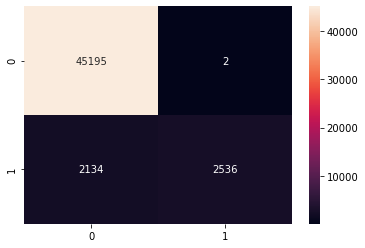

In [313]:
Y_train_pred3 = grid1.predict(X_train)
Y_test_pred3 = grid1.predict(X_test)

print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred3))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred3))
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred3))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred3))
cm = confusion_matrix(Y_test, Y_test_pred3)
sns.heatmap(cm, annot=True, fmt="d")

#f1-score on train set :  0.6973901098901097
#f1-score on test set :  0.703662597114317

# Addaboost and XGboost <a class="anchor" id="2e"></a>
[return to contents](#0)

In [314]:
Fraud_Data.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'country', 'time', 'ip_count', 'country_count', 'Country_count'],
      dtype='object')

In [315]:
from sklearn.ensemble import AdaBoostRegressor 
regressor_ada = AdaBoostRegressor()
regressor_ada.fit(X_train, Y_train)
regressor_ada.score(X_test, Y_test)

0.518347490758375

In [316]:
from xgboost import XGBRegressor
regressor_xgb = XGBRegressor()
regressor_xgb.fit(X_train, Y_train)
regressor_xgb.score(X_test, Y_test)


[14:35:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.5182273996503923

In [317]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

rtc = XGBClassifier(n_jobs = -1, random_state =42)
params = {'max_depth' : np.arange(1,6),
          "learning_rate" : np.arange(0.1,0.5,0.05),
          "n_estimators" : np.arange(10,100,10)}

grid =  GridSearchCV(estimator=rtc,       # On indique le type d'estimator que l'on veut tester
                     param_grid= params,  # On indique le dictionnaire des parametres a faire varier (cf ci-dessus)
                     cv = 10,             # Le nombre de sous echantillon sur lequel le modele va tourner
                    n_jobs =-1)      

# CAREFUL TIME TO RUN THE BELOW IS VERY LONG
grid.fit(X_train, Y_train)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:   54.4s
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   57.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   57.3s
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:  1.1min
[Paralle

[Parallel(n_jobs=-1)]: Done 265 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.7min
[Paralle

[Parallel(n_jobs=-1)]: Done 399 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 401 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 403 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 406 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 407 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 409 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 411 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 414 tasks      | elapsed:  4.8min
[Paralle

[Parallel(n_jobs=-1)]: Done 533 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 534 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 535 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 537 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 539 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 541 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 542 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 543 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 545 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 547 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 548 tasks      | elapsed:  6.2min
[Paralle

[Parallel(n_jobs=-1)]: Done 666 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 667 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 669 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 670 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 671 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 673 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 675 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 677 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 679 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 681 tasks      | elapsed:  7.4min
[Paralle

[Parallel(n_jobs=-1)]: Done 799 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 800 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 801 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 802 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 803 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 804 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 805 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 806 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 807 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 809 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 810 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 811 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 813 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 814 tasks      | elapsed:  9.5min
[Paralle

[Parallel(n_jobs=-1)]: Done 932 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 933 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 934 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 935 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 936 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 937 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 938 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 939 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 940 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 942 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 943 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 945 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 946 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 947 tasks      | elapsed: 11.4min
[Paralle

[Parallel(n_jobs=-1)]: Done 1064 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 1065 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 1066 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 1067 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 1068 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 1069 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 1070 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 1071 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 1073 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 1074 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 1075 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 1076 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 1077 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 1078 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 1079 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1195 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 1196 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 1197 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 1198 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 1199 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 1201 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 1203 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 1204 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 1205 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 1206 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 1207 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 1208 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 1209 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 1210 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1326 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 1327 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 1328 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 1329 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 1330 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 1331 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 1332 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 1333 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 1334 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 1335 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 1336 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 1337 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 1338 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 1339 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 1340 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 1341 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1457 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 1458 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 1459 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 1460 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 1461 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 1462 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 1463 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 1464 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 1465 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 1466 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 1467 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 1468 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 1469 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 1470 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 1471 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 1472 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1588 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 1589 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 1590 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 1591 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 1592 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 1593 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 1594 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 1595 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 1596 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 1597 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 1598 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 1599 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 1600 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 1601 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 1602 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 1603 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1719 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 1720 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 1721 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 1722 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 1723 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 1724 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 1725 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 1726 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 1727 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 1728 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 1729 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 1730 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 1731 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 1732 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 1733 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 1734 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1851 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 1852 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 1853 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 1854 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 1855 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 1856 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 1857 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 1858 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 1859 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 1860 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 1861 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 1862 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 1863 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 1864 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 1865 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 1866 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1983 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 1984 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 1985 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 1986 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 1987 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 1988 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 1989 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 1990 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 1991 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 1992 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 1993 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 1994 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 1995 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 1996 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 1997 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 1998 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2114 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 2115 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 2116 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 2117 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 2118 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 2119 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 2120 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 2121 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 2122 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 2123 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 2124 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 2125 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 2126 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 2127 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done 2128 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done 2129 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2245 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 2246 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 2247 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 2248 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 2249 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 2250 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 2251 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 2252 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 2253 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 2254 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 2255 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 2256 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 2257 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 2258 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 2259 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 2260 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2377 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 2378 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 2379 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 2380 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 2381 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 2382 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 2383 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 2384 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 2385 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 2386 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 2387 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 2388 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 2389 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 2390 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 2391 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 2392 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2508 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 2509 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 2510 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 2511 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 2512 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 2513 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 2514 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 2515 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 2516 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 2517 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 2518 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 2519 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 2520 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 2521 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 2522 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 2523 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2639 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 2640 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 2641 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 2642 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 2643 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 2644 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 2645 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 2646 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 2647 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 2648 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 2649 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 2650 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 2651 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 2652 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 2653 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 2654 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2770 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 2771 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 2772 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 2773 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 2774 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 2775 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 2776 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 2777 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 2778 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 2779 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 2780 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 2781 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 2782 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 2783 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 2784 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 2785 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2901 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 2902 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 2903 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 2904 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 2905 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 2906 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 2907 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 2908 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 2909 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 2910 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 2911 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 2912 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 2913 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 2914 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 2915 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 2916 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3033 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 3034 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 3035 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 3036 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 3037 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 3038 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 3039 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 3041 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 3042 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 3043 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 3044 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 3045 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 3046 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 3047 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 3048 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3164 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 3165 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 3166 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 3167 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 3169 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 3170 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 3171 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 3172 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 3173 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 3174 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 3175 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 3177 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 3178 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 3179 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3295 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 3296 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 3297 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 3298 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 3299 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 3300 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 3301 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 3302 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 3303 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 3304 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 3305 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 3306 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 3307 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 3308 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 3309 tasks      | elapsed: 38.3min
[Parallel(n_jobs=-1)]: Done 3310 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3426 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 3427 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 3428 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 3429 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 3430 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 3431 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 3432 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 3433 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 3434 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 3435 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 3436 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 3437 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 3438 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 3439 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 3440 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 3441 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3557 tasks      | elapsed: 41.0min
[Parallel(n_jobs=-1)]: Done 3558 tasks      | elapsed: 41.0min
[Parallel(n_jobs=-1)]: Done 3559 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done 3560 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done 3561 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done 3562 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done 3563 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done 3564 tasks      | elapsed: 41.2min
[Parallel(n_jobs=-1)]: Done 3565 tasks      | elapsed: 41.2min
[Parallel(n_jobs=-1)]: Done 3566 tasks      | elapsed: 41.2min
[Parallel(n_jobs=-1)]: Done 3567 tasks      | elapsed: 41.2min
[Parallel(n_jobs=-1)]: Done 3568 tasks      | elapsed: 41.2min
[Parallel(n_jobs=-1)]: Done 3569 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 3570 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 3571 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 3572 tasks      | elapsed: 

GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
                         'max_depth': array([1, 2, 3, 4, 5]),
               

In [318]:
print("tuned hpyerparameters :(best parameters) ",grid.best_params_)
print("accuracy :",grid.best_score_)
#tuned hpyerparameters :(best parameters)  {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 10}
#accuracy : 0.9563632497768412

tuned hpyerparameters :(best parameters)  {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 10}
accuracy : 0.9563632497768412


In [381]:
Y_train_pred4 = grid.predict(X_train)
Y_test_pred4 = grid.predict(X_test)


Accuracy on training set :  0.956363277198874
Accuracy on test set :  0.9572061684079652
f1-score on train set :  0.6962321232123212
f1-score on test set :  0.7039400665926749


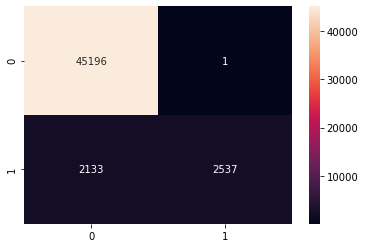

In [382]:
print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred4))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred4))
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred4))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred4))
cm = confusion_matrix(Y_test, Y_test_pred4)
sns.heatmap(cm, annot=True, fmt="d")

#f1-score on train set :  0.6962321232123212
#f1-score on test set :  0.7039400665926749

In [264]:
print(grid.best_estimator_.feature_importances_)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


# Staking and Voting <a class="anchor" id="3"></a>
[return to contents](#0)

## Voting <a class="anchor" id="3a"></a>
[return to contents](#0)

In [388]:
from sklearn.ensemble import VotingClassifier
vot = VotingClassifier(
    estimators = [("logreg", LogisticRegressionCV(class_weight={0:0.096,1:0.904})), 
                  ("logreg_gridsearch", LogisticRegression(class_weight={0:0.096,1:0.904},
                                                C= 1.0, max_iter= 100, penalty='l1', solver='liblinear')), 
                  ("RandomF_gini", RandomForestClassifier(n_jobs=-1,criterion="gini",class_weight={0:0.096,1:0.904})),
                  ("RandomF_entropy", RandomForestClassifier(n_jobs=-1,criterion="entropy",class_weight={0:0.096,1:0.904})),
                  ("RandomF_gridsearch", RandomForestClassifier(n_jobs=-1,criterion="entropy",class_weight={0:0.096,1:0.904},
                                                               max_depth= 8, min_samples_split= 2, n_estimators= 24)),
                  ("XGBClf_gridsearch", XGBClassifier(n_jobs=-1,learning_rate = 0.1, max_depth= 1, n_estimators= 10))]
)

In [389]:
vot.fit(X_train, Y_train)
vot.score(X_test, Y_test)

0.9572061684079652

In [390]:
Y_train_pred_vot = vot.predict(X_train)
Y_test_pred_vot = vot.predict(X_test)


Accuracy on training set :  0.9566003259420218
Accuracy on test set :  0.9572061684079652
f1-score on train set :  0.6983800109829764
f1-score on test set :  0.7038578961976131


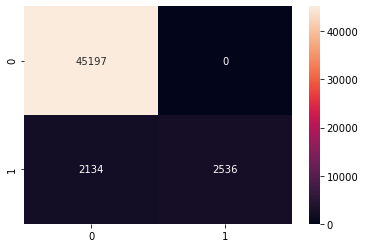

In [391]:
print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred_vot))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred_vot))
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred_vot))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred_vot))
cm = confusion_matrix(Y_test, Y_test_pred_vot)
sns.heatmap(cm, annot=True, fmt="d")

## Staking <a class="anchor" id="3b"></a>
[return to contents](#0)

In [623]:
from sklearn.ensemble import StackingClassifier
stack = StackingClassifier(
    estimators = [("logreg", LogisticRegressionCV(class_weight={0:0.096,1:0.904})), 
                  ("logreg_gridsearch", LogisticRegression(class_weight={0:0.096,1:0.904},
                                                C= 1.0, max_iter= 100, penalty='l1', solver='liblinear')), 
                  ("RandomF_gini", RandomForestClassifier(n_jobs=-1,criterion="gini",class_weight={0:0.096,1:0.904})),
                  ("RandomF_entropy", RandomForestClassifier(n_jobs=-1,criterion="entropy",class_weight={0:0.096,1:0.904})),
                  ("RandomF_gridsearch", RandomForestClassifier(n_jobs=-1,criterion="entropy",class_weight={0:0.096,1:0.904},
                                                               max_depth= 8, min_samples_split= 2, n_estimators= 24)),
                  ("XGBClf_gridsearch", XGBClassifier(n_jobs=-1,learning_rate = 0.1, max_depth= 1, n_estimators= 10)),
                  ("Voting", VotingClassifier(
    estimators = [("logreg", LogisticRegressionCV(class_weight={0:0.096,1:0.904})), 
                  ("logreg_gridsearch", LogisticRegression(class_weight={0:0.096,1:0.904},
                                                C= 1.0, max_iter= 100, penalty='l1', solver='liblinear')), 
                  ("RandomF_gini", RandomForestClassifier(n_jobs=-1,criterion="gini",class_weight={0:0.096,1:0.904})),
                  ("RandomF_entropy", RandomForestClassifier(n_jobs=-1,criterion="entropy",class_weight={0:0.096,1:0.904})),
                  ("RandomF_gridsearch", RandomForestClassifier(n_jobs=-1,criterion="entropy",class_weight={0:0.096,1:0.904},
                                                               max_depth= 8, min_samples_split= 2, n_estimators= 24)),
                  ("XGBClf_gridsearch", XGBClassifier(n_jobs=-1,learning_rate = 0.1, max_depth= 1, n_estimators= 10))]
))],
    final_estimator=RandomForestClassifier()
)

In [624]:
stack.fit(X_train, Y_train)
stack.score(X_test, Y_test)

0.9572061684079652

In [625]:
Y_train_pred_stack = stack.predict(X_train)
Y_test_pred_stack = stack.predict(X_test)

Accuracy on training set :  0.9563929082917675
Accuracy on test set :  0.9572061684079652
f1-score on train set :  0.6965009967690933
f1-score on test set :  0.7039400665926749


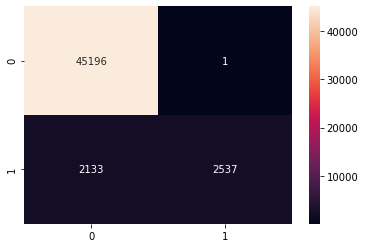

In [626]:
print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred_stack))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred_stack))
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred_stack))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred_stack))
cm = confusion_matrix(Y_test, Y_test_pred_stack)
sns.heatmap(cm, annot=True, fmt="d")

# Bonus : PCA SMOTETomek <a class="anchor" id="4"></a>
[return to contents](#0)

Resampling technique named SMOTETomek, which combines undersampling and oversampling. SMOTETomek is a good way to avoid the disadvantages of the SMOTE and the Tomek Link technique. The SMOTETomek technique is applied using the library from imbalanced_learn, and included an SMOTE function for oversampling as well as a Tomek Link function for undersampling. The algorithm flow of the SMOTETomek method is to combine SMOTE and Tomek Link to form a pipeline. The standard flow is as follows:

Step 1: For a dataset D with an unbalanced data distribution, it uses the SMOTE method to obtain an extended dataset D’ by generating many new minority samples.

Step2: Tomek Link pairs in dataset D’ are removed using the Tomek Link method.

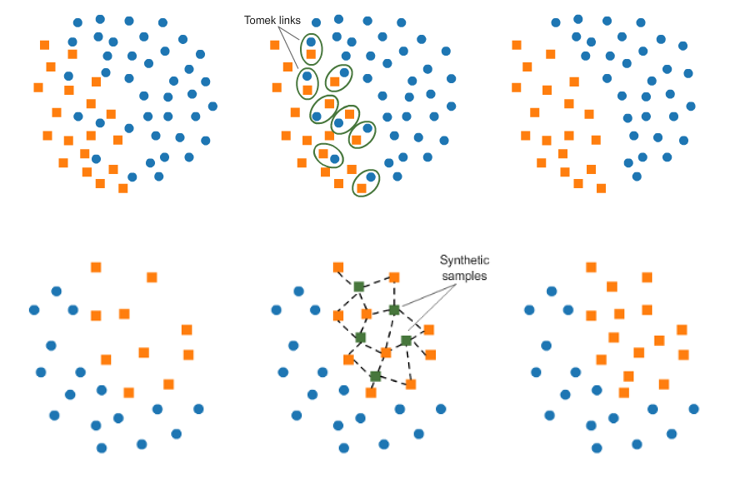

In [648]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.combine import SMOTETomek
from collections import Counter

In [649]:
print('Original dataset shape {}'.format(Counter(Y_train)))

Original dataset shape Counter({0: 91764, 1: 9481})


In [747]:
Fraud_Data.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'country', 'time', 'ip_count', 'Country_count', 'signup_seconds_of_day',
       'month_purchase'],
      dtype='object')

In [772]:
features_list = [ 'age','purchase_value', 'ip_count','time']
target_variable = "class"

X1 = Fraud_Data.loc[:,features_list]
Y1 = Fraud_Data.loc[:,target_variable]

In [773]:
idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X1.dtypes.iteritems():
  if ('float' in str(t)) or ('int' in str(t)) :
    numeric_features.append(i)
    numeric_indices.append(idx)
  else :
    categorical_features.append(i)
    categorical_indices.append(idx)

  idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['age', 'purchase_value', 'ip_count', 'time']  at positions  [0, 1, 2, 3]
Found categorical features  []  at positions  []


In [774]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size=0.33, 
                                                    random_state=0, stratify=Y)

In [775]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import  OneHotEncoder
from sklearn.compose import ColumnTransformer

# Normalization
numeric_transformer = StandardScaler()

# OHE / dummyfication
categorical_transformer = OneHotEncoder(drop='first')


featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices),    
        ('num', numeric_transformer, numeric_indices)
        ]
    )

X_train1 = featureencoder.fit_transform(X_train1)

X_test1 = featureencoder.transform(X_test1)

In [776]:
# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)

# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X_train1)


# Apply the random under-sampling
tl = SMOTETomek(sampling_strategy='not minority')
X_resampled, Y_resampled = tl.fit_sample(X_train1, Y_train1)
X_res_vis = pca.transform(X_resampled)

print('Resampled dataset shape %s' % Counter(Y_resampled))


Resampled dataset shape Counter({0: 89035, 1: 6752})


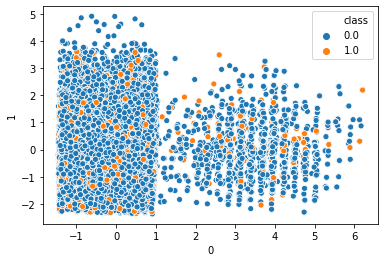

In [790]:
XX= pd.DataFrame(X_vis)
YY= pd.DataFrame(X_res_vis)

sns.scatterplot(x=XX.loc[:,0], y=XX.loc[:,1],hue = Y_train1 )


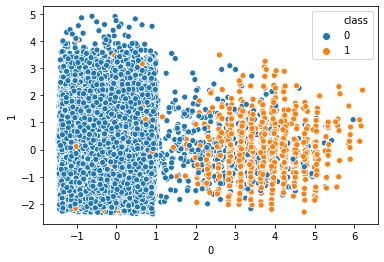

In [778]:
sns.scatterplot(x=YY.loc[:,0], y=YY.loc[:,1],hue = Y_resampled )

In [779]:
XGB =  XGBClassifier(n_jobs=-1,learning_rate = 0.1, max_depth= 1, n_estimators= 10)
reg1 = XGB.fit(X_resampled, Y_resampled)

Y_train_pred1 = reg1.predict(X_resampled)
Y_test_pred1 = reg1.predict(X_test1)

print("Accuracy on training set : ", accuracy_score(Y_resampled, Y_train_pred1))
print("Accuracy on test set : ", accuracy_score(Y_test1, Y_test_pred1))

# print classification report
print("Classification Report:\n\n", classification_report(Y_test1, Y_test_pred1))

Accuracy on training set :  0.9823671270631714
Accuracy on test set :  0.9572061684079652
Classification Report:

               precision    recall  f1-score   support

           0       0.95      1.00      0.98     45197
           1       1.00      0.54      0.70      4670

    accuracy                           0.96     49867
   macro avg       0.98      0.77      0.84     49867
weighted avg       0.96      0.96      0.95     49867



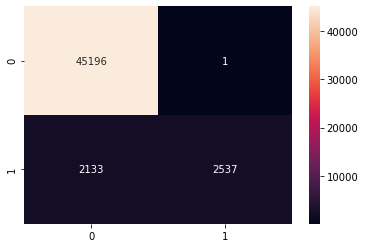

In [780]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test1, Y_test_pred1)
sns.heatmap(cm, annot=True, fmt="d")

# Evaluation report<a class="anchor" id="5"></a>
[return to contents](#0)

In [ ]:
from sklearn import model_selection
# prepare models
models = []
models.append(("logreg", LogisticRegressionCV(class_weight={0:0.096,1:0.904})))
models.append(("logreg_gridsearch", LogisticRegression(class_weight={0:0.096,1:0.904},
                                                C= 1.0, max_iter= 100, penalty='l1', solver='liblinear')))
models.append(("RandomF_gini", RandomForestClassifier(n_jobs=-1,criterion="gini",class_weight={0:0.096,1:0.904})))
models.append(("RandomF_entropy", RandomForestClassifier(n_jobs=-1,criterion="entropy",class_weight={0:0.096,1:0.904})))
models.append(("RandomF_gridsearch", RandomForestClassifier(n_jobs=-1,criterion="entropy",class_weight={0:0.096,1:0.904},
                                                               max_depth= 8, min_samples_split= 2, n_estimators= 24)))
models.append(("XGBClf_gridsearch", XGBClassifier(n_jobs=-1,learning_rate = 0.1, max_depth= 1, n_estimators= 10)))
models.append(("Voting",VotingClassifier(
    estimators = [("logreg", LogisticRegressionCV(class_weight={0:0.096,1:0.904})), 
                  ("logreg_gridsearch", LogisticRegression(class_weight={0:0.096,1:0.904},
                                                C= 1.0, max_iter= 100, penalty='l1', solver='liblinear')), 
                  ("RandomF_gini", RandomForestClassifier(n_jobs=-1,criterion="gini",class_weight={0:0.096,1:0.904})),
                  ("RandomF_entropy", RandomForestClassifier(n_jobs=-1,criterion="entropy",class_weight={0:0.096,1:0.904})),
                  ("RandomF_gridsearch", RandomForestClassifier(n_jobs=-1,criterion="entropy",class_weight={0:0.096,1:0.904},
                                                               max_depth= 8, min_samples_split= 2, n_estimators= 24)),
                  ("XGBClf_gridsearch", XGBClassifier(n_jobs=-1,learning_rate = 0.1, max_depth= 1, n_estimators= 10))])))


logreg: 0.675661 (0.011496)
logreg_gridsearch: 0.675437 (0.011347)
RandomF_gini: 0.695438 (0.011019)
RandomF_entropy: 0.694966 (0.010963)
RandomF_gridsearch: 0.695931 (0.012119)
XGBClf_gridsearch: 0.696074 (0.011984)
Voting: 0.696074 (0.011984)


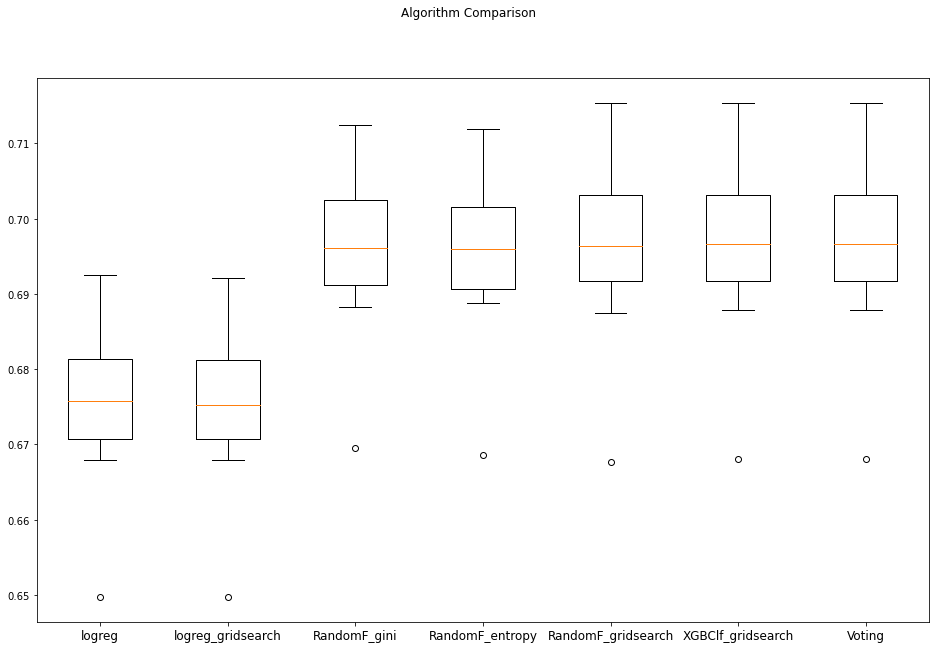

In [451]:
# evaluate each model in turn
results = []
names = []
scoring = 'f1'
for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(16,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, fontsize='12')
plt.show()

logreg: 0.683666 (0.024377)
logreg_gridsearch: 0.683485 (0.024430)
RandomF_gini: 0.703425 (0.022718)
RandomF_entropy: 0.703046 (0.022552)
RandomF_gridsearch: 0.703756 (0.021945)
XGBClf_gridsearch: 0.703957 (0.022089)
Voting: 0.703957 (0.022089)


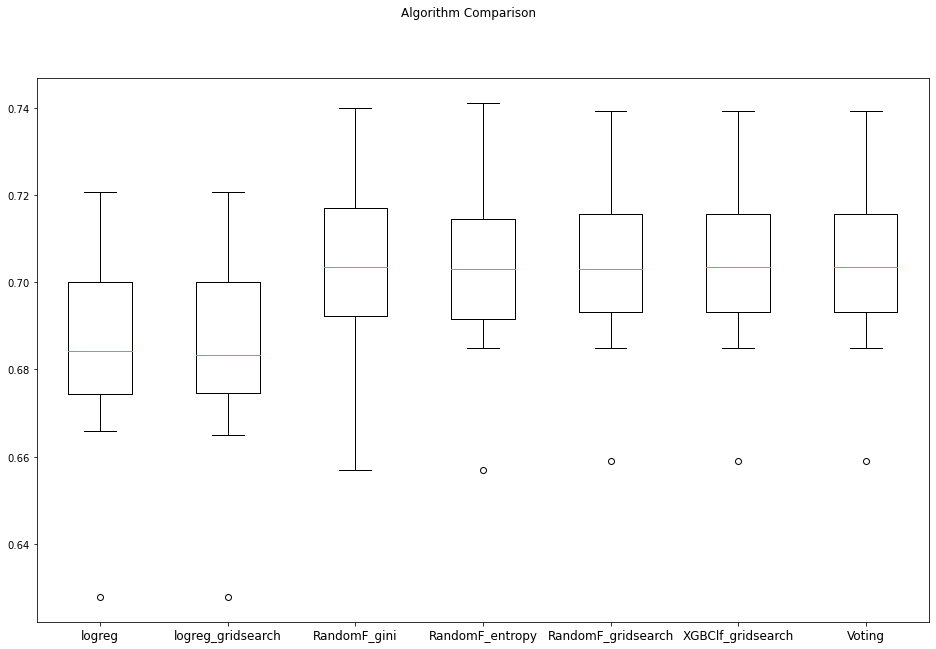

In [454]:
# evaluate each model in turn
results = []
names = []
scoring = 'f1'
for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_test, Y_test, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(16,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, fontsize='12')
plt.show()

In [518]:
# evaluate each model in turn
results = []
names = []
testf1= []
scoring = 'f1'
for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_test, Y_test, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        testf1.append(cv_results.mean())

In [517]:
# evaluate each model in turn
results = []
names = []
trainf1= []
scoring = 'accuracy'
for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        trainf1.append(cv_results.mean())

In [519]:
# evaluate each model in turn
results = []
names = []
testaccur= []
scoring = 'accuracy'
for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_test, Y_test, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        testaccur.append(cv_results.mean())

In [520]:
# evaluate each model in turn
results = []
names = []
trainaccur= []
scoring = 'accuracy'
for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        trainaccur.append(cv_results.mean())

In [521]:
# evaluate each model in turn
results = []
names = []
testrecall= []
scoring = 'recall'
for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_test, Y_test, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        testrecall.append(cv_results.mean())

In [522]:
# evaluate each model in turn
results = []
names = []
trainrecall= []
scoring = 'recall'
for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        trainrecall.append(cv_results.mean())

In [575]:
Score=[]
Score=pd.DataFrame(Score)

In [576]:
Score['Models']= names
Score['F1_test']=np.round(testf1,5)
Score['F1_train']=np.round(trainf1,5)
Score['Accur_test']=np.round(testaccur,4)
Score['Accur_train']=np.round(trainaccur,4)
Score['Recall_test']=np.round(testrecall,4)
Score['Recall_train']=np.round(trainrecall,4)

In [583]:
Score.sort_values('F1_test',ascending=False)

Models  F1_test  F1_train  Accur_test  Accur_train  \
5   XGBClf_gridsearch  0.70396   0.69607      0.9572       0.9564   
6              Voting  0.70396   0.69607      0.9572       0.9564   
4  RandomF_gridsearch  0.70365   0.69593      0.9571       0.9563   
3     RandomF_entropy  0.70353   0.69526      0.9571       0.9562   
2        RandomF_gini  0.70325   0.69530      0.9570       0.9561   
0              logreg  0.68367   0.67566      0.9528       0.9518   
1   logreg_gridsearch  0.68348   0.67544      0.9527       0.9518   

   Recall_test  Recall_train  
5       0.5436        0.5340  
6       0.5436        0.5340  
4       0.5438        0.5340  
3       0.5441        0.5342  
2       0.5438        0.5342  
0       0.5453        0.5365  
1       0.5455        0.5365

In [612]:
Fraud_Data['fraud_purchase'] = Fraud_Data['purchase_value']*Fraud_Data['class']
print(np.round(Fraud_Data['fraud_purchase'][Fraud_Data['fraud_purchase']>0].mean(),2))
print(np.round(Fraud_Data['purchase_value'][Fraud_Data['class']==0].mean(),2))

36.99
36.93
